# HOUSING PROJECT

IMPORTING LIBRARIES

In [1]:
#important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

import warnings
warnings.filterwarnings('ignore')

IMPORTING DATASETS

In [2]:
df_train=pd.read_csv(r'C:/Users/user/Desktop/FRTech Internship Project/Project-Housing_splitted/train.csv')
df_test=pd.read_csv(r'C:/Users/user/Desktop/FRTech Internship Project/Project-Housing_splitted/test.csv')

In [3]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

df_train is for training purpose for the model

In [4]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

df_test is for predicting purpose for the model

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [6]:
df_train.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1168.000000  1168.000000     1168    954.00000    1168.000000   1168   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN      928          NaN            NaN   1164   
mean     724.136130    56.767979      NaN     70.98847   10484.749144    NaN   
std      416.159877    41.940650      NaN     24.82875    8957.442311    NaN   
min        1.000000    20.000000      NaN     21.00000    1300.000000    NaN   
25%      360.500000    20.000000      NaN     60.00000    7621.500000    NaN   
50%      714.500000    50.000000      NaN     70.00000    9522.500000    NaN   
75%     1079.500000    70.000000      NaN     80.00000   11515.500000    NaN   
max     1460.000000   190.000000      NaN    313.00000  164660.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     77     1168        1168      1168  ...  1168.000000      7    237   
unique     2        4           4         1  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      41      740        1046      1168  ...          NaN      3    129   
mean     NaN      NaN         NaN       NaN  ...     3.448630    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    44.896939    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           44   1168.000000  1168.000000  1168.000000      1168   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            40           NaN          NaN          NaN       999   
mean           NaN     47.315068     6.344178  2007.804795       NaN   
std            NaN    543.264432     2.686352     1.329738       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1168    1168.000000  
unique              6            NaN  
top            Normal            NaN  
freq              945            NaN  
mean              NaN  181477.005993  
std               NaN   79105.586863  
min               NaN   34900.000000  
25%               NaN  130375.000000  
50%               NaN  163995.000000  
75%               NaN  215000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

In [7]:
df_train.shape

(1168, 81)

In [8]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df_train.iterrows

<bound method DataFrame.iterrows of        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities 

In [10]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
type(df_train)

pandas.core.frame.DataFrame

In [12]:
corr=df_train.corr()
corr.shape

(38, 38)

In [13]:
corr

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.004259    -0.006629 -0.029212    -0.036965   
MSSubClass     0.004259    1.000000    -0.365220 -0.124151     0.070462   
LotFrontage   -0.006629   -0.365220     1.000000  0.557257     0.247809   
LotArea       -0.029212   -0.124151     0.557257  1.000000     0.107188   
OverallQual   -0.036965    0.070462     0.247809  0.107188     1.000000   
OverallCond    0.039761   -0.056978    -0.053345  0.017513    -0.083167   
YearBuilt     -0.016942    0.023988     0.118554  0.005506     0.575800   
YearRemodAdd  -0.018590    0.056618     0.096050  0.027228     0.555945   
MasVnrArea    -0.060652    0.027868     0.202225  0.121448     0.409163   
BsmtFinSF1     0.003868   -0.052236     0.247780  0.221851     0.219643   
BsmtFinSF2     0.005269   -0.062403     0.002514  0.056656    -0.040893   
BsmtUnfSF     -0.019494   -0.134170     0.123943  0.006600     0.308676   
TotalBsmtSF   -0.013812   -0.214042     0.386261  0.259733     0.528285   
1stFlrSF       0.009647   -0.227927     0.448186  0.312843     0.458758   
2ndFlrSF      -0.029671    0.300366     0.099250  0.059803     0.316624   
LowQualFinSF  -0.070180    0.053737     0.007885 -0.001915    -0.039295   
GrLivArea     -0.024325    0.086448     0.410414  0.281360     0.599700   
BsmtFullBath   0.023027    0.004556     0.104255  0.142387     0.101732   
BsmtHalfBath  -0.043572    0.008207     0.001528  0.059282    -0.030702   
FullBath      -0.015187    0.140807     0.189321  0.123197     0.548824   
HalfBath      -0.028512    0.168423     0.053168  0.007271     0.296134   
BedroomAbvGr   0.009376   -0.013283     0.264010  0.117351     0.099639   
KitchenAbvGr   0.001216    0.283506    -0.002890 -0.013075    -0.178220   
TotRmsAbvGrd  -0.001613    0.051179     0.351969  0.184546     0.432579   
Fireplaces    -0.024175   -0.035792     0.262076  0.285983     0.390067   
GarageYrBlt   -0.000469    0.077630     0.061101 -0.034981     0.541719   
GarageCars     0.007549   -0.027639     0.276798  0.158313     0.596322   
GarageArea     0.010048   -0.092408     0.344908  0.195162     0.566782   
WoodDeckSF    -0.027498   -0.022609     0.101751  0.216720     0.227137   
OpenPorchSF   -0.013642    0.017468     0.167092  0.093080     0.341030   
EnclosedPorch  0.004885   -0.004252     0.023118 -0.007446    -0.098374   
3SsnPorch     -0.021773   -0.043210     0.059508  0.025794     0.045919   
ScreenPorch    0.005169   -0.013291     0.033111  0.025256     0.059387   
PoolArea       0.065832    0.009583     0.223429  0.097107     0.072247   
MiscVal        0.001304   -0.023503    -0.004559  0.051679    -0.025786   
MoSold         0.023479   -0.016015     0.025046  0.015141     0.090638   
YrSold        -0.008853   -0.038595    -0.004296 -0.035399    -0.048759   
SalePrice     -0.023897   -0.060775     0.341294  0.249499     0.789185   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.039761  -0.016942     -0.018590   -0.060652    0.003868   
MSSubClass       -0.056978   0.023988      0.056618    0.027868   -0.052236   
LotFrontage      -0.053345   0.118554      0.096050    0.202225    0.247780   
LotArea           0.017513   0.005506      0.027228    0.121448    0.221851   
OverallQual      -0.083167   0.575800      0.555945    0.409163    0.219643   
OverallCond       1.000000  -0.377731      0.080669   -0.137882   -0.028810   
YearBuilt        -0.377731   1.000000      0.592829    0.323006    0.227933   
YearRemodAdd      0.080669   0.592829      1.000000    0.181869    0.114430   
MasVnrArea       -0.137882   0.323006      0.181869    1.000000    0.267066   
BsmtFinSF1       -0.028810   0.227933      0.114430    0.267066    1.000000   
BsmtFinSF2        0.044336  -0.027682     -0.044694   -0.065723   -0.052145   
BsmtUnfSF        -0.146384   0.155559      0.174732    0.109850   -0.499861   
TotalBsmtSF      -0.162481   0.386265      0.280720    0.366833    0

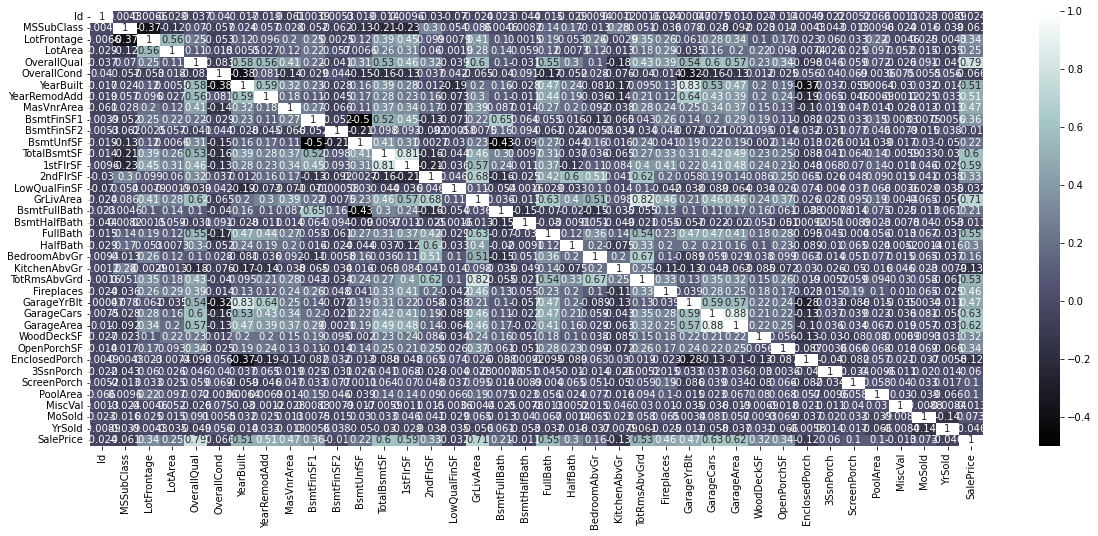

In [14]:
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True,cmap='bone')
plt.show()

In [15]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

DATA  VISUALIZATION

<AxesSubplot:title={'center':'Linear feet of street connected to property'}>

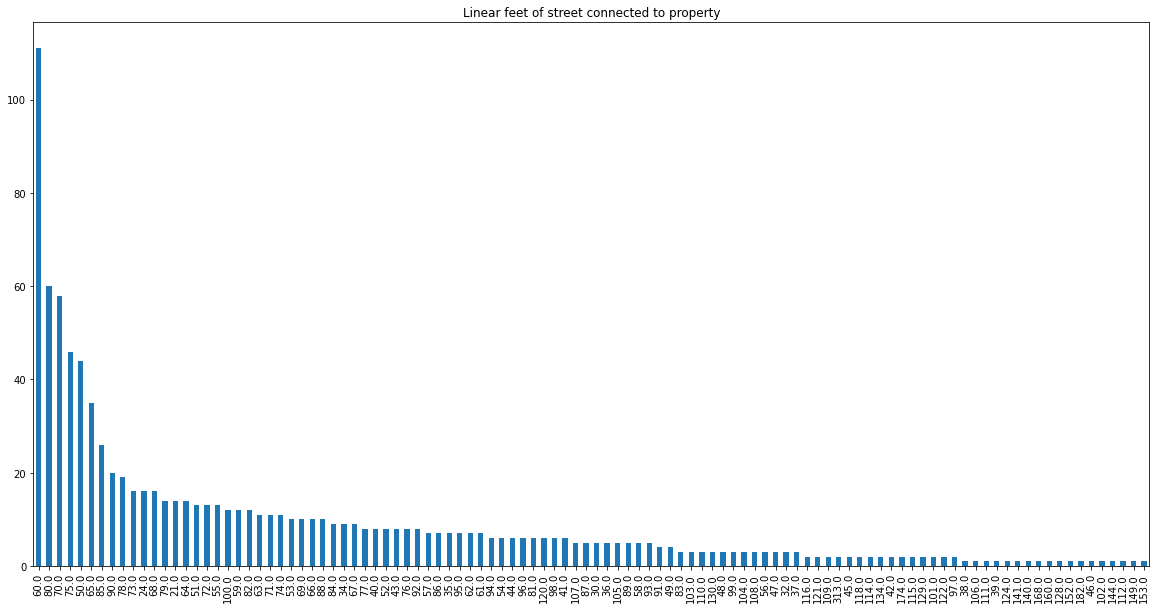

In [16]:
plt.subplot()
df_train['LotFrontage'].value_counts().plot(kind='bar',title='Linear feet of street connected to property',figsize=(20,10))

<AxesSubplot:title={'center':'General Zoning'}>

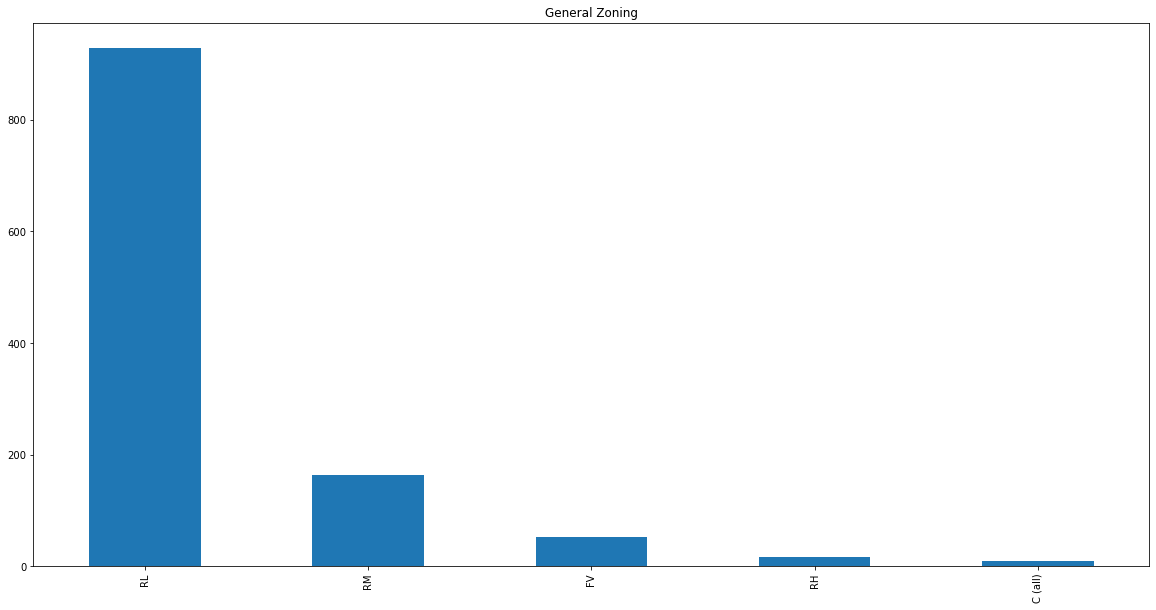

In [17]:
plt.subplot()
df_train['MSZoning'].value_counts().plot(kind='bar',title='General Zoning',figsize=(20,10))

<AxesSubplot:title={'center':'Type of Dwelling'}>

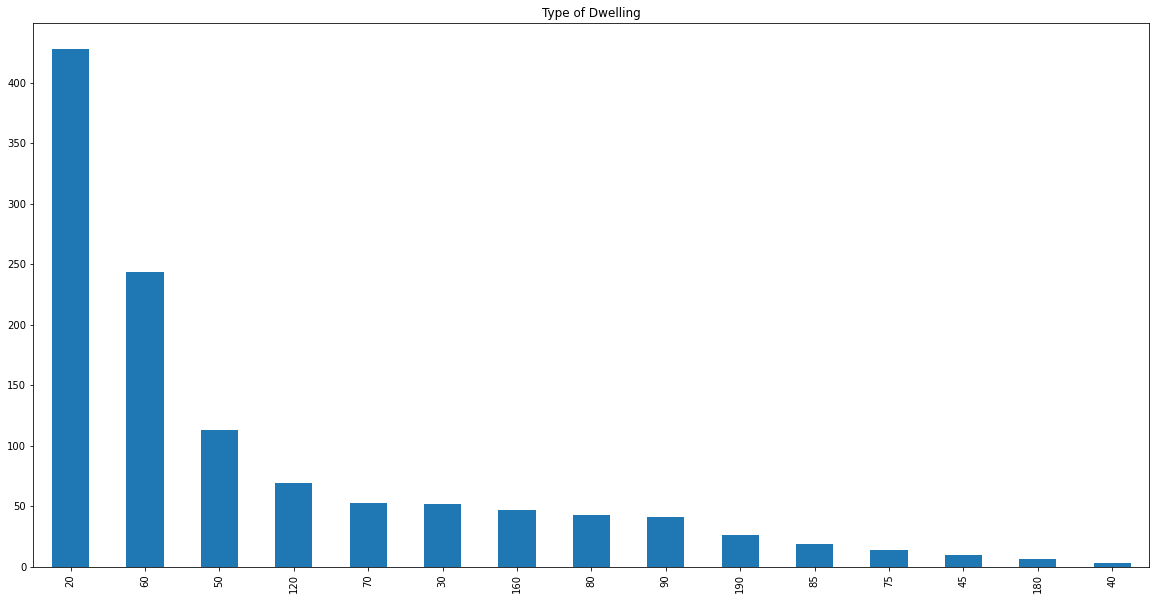

In [18]:
plt.subplot()
df_train['MSSubClass'].value_counts().plot(kind='bar',title='Type of Dwelling',figsize=(20,10))

<AxesSubplot:title={'center':'Year Built : Original Construction Date'}>

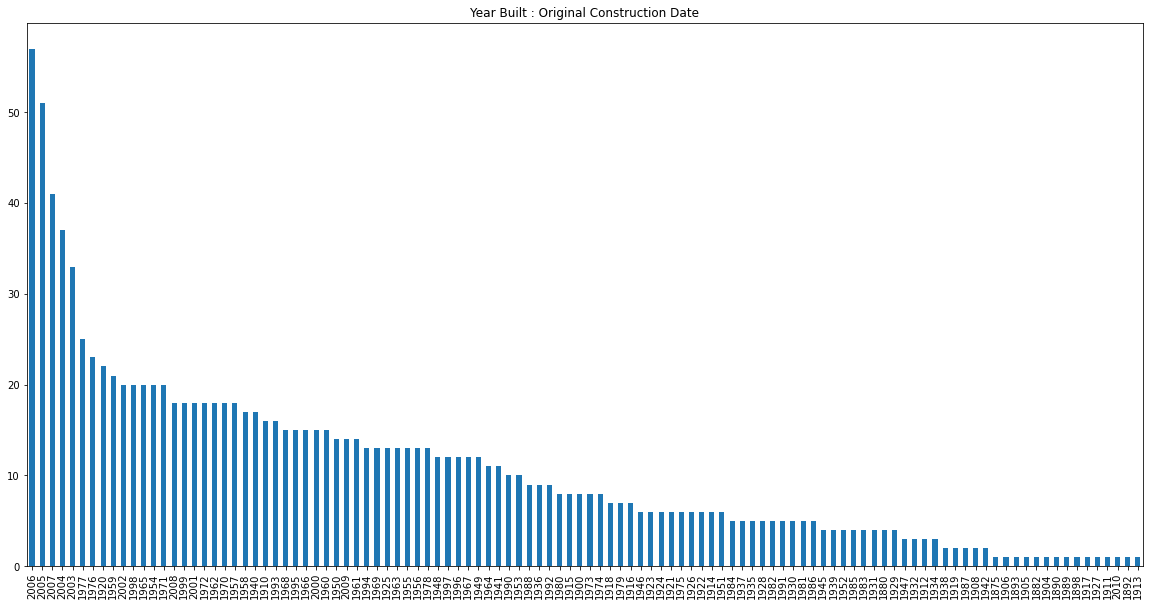

In [19]:
plt.subplot()
df_train['YearBuilt'].value_counts().plot(kind='bar',title='Year Built : Original Construction Date',figsize=(20,10))

<AxesSubplot:title={'center':'Misclleanous Value'}>

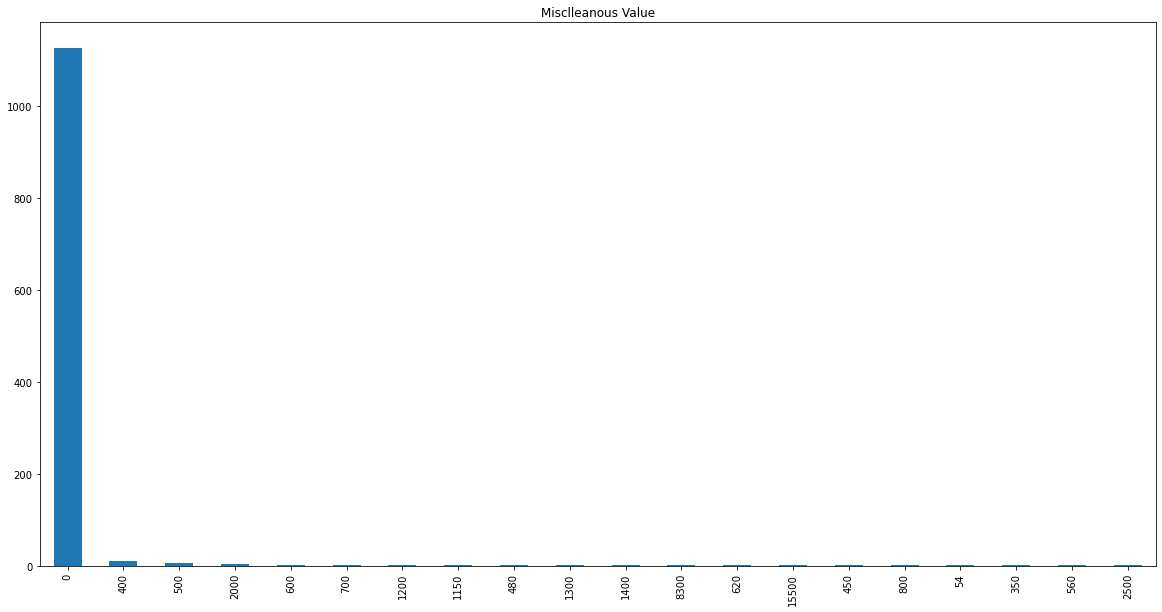

In [20]:
plt.subplot()
df_train['MiscVal'].value_counts().plot(kind='bar',title='Misclleanous Value',figsize=(20,10))

<AxesSubplot:title={'center':'Month Sold'}>

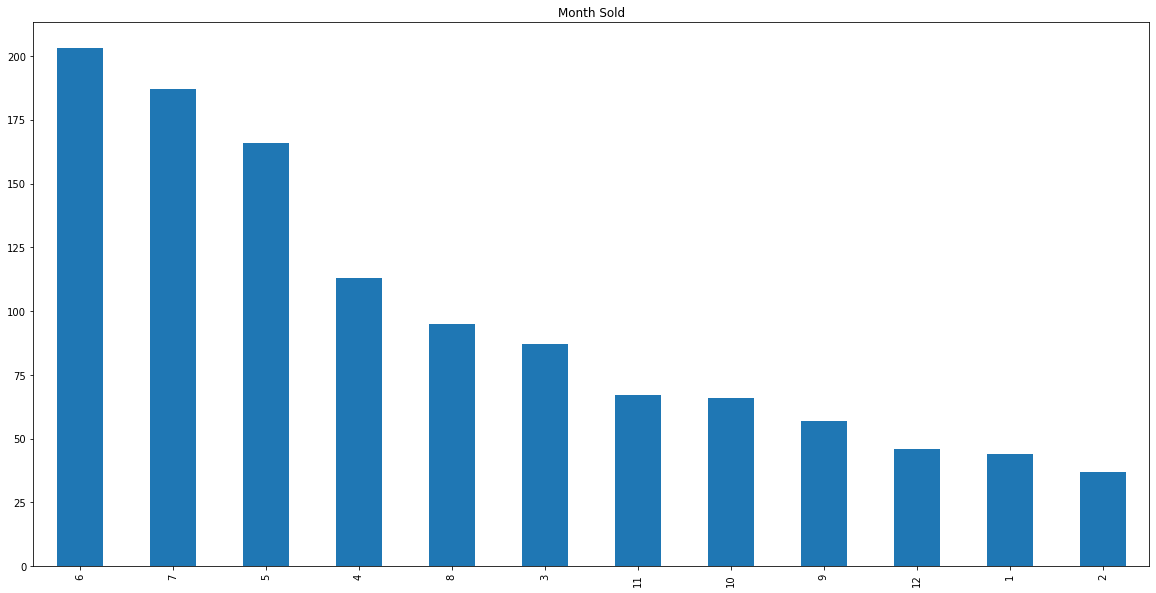

In [21]:
plt.subplot()
df_train['MoSold'].value_counts().plot(kind='bar',title='Month Sold',figsize=(20,10))

<AxesSubplot:title={'center':'MiscFeature: Miscellaneous feature not covered in other categories'}>

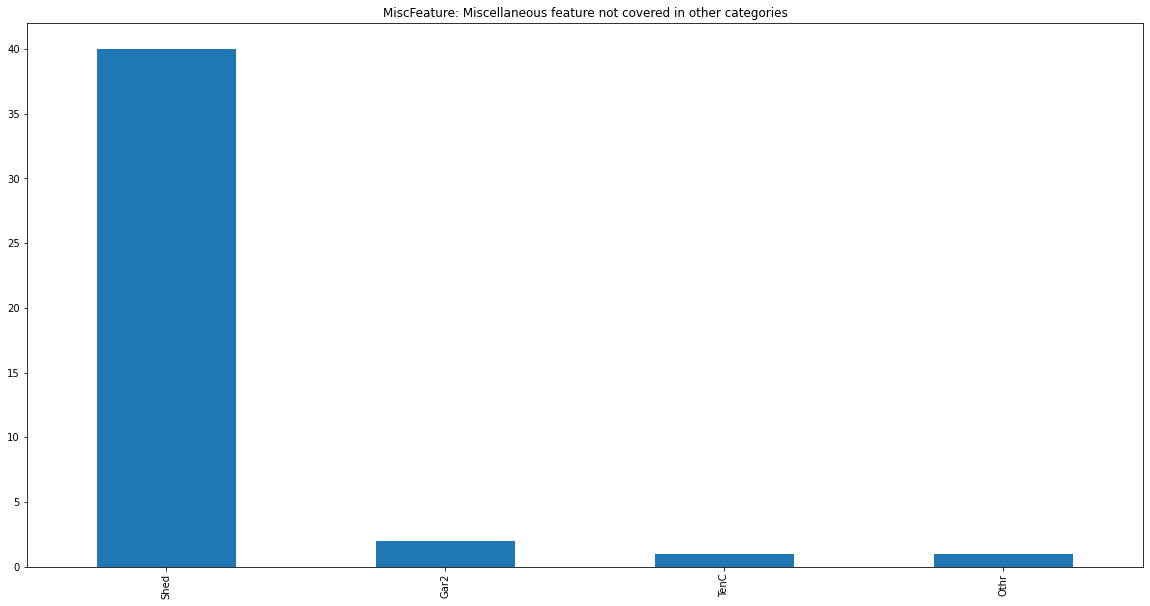

In [22]:
plt.subplot()
df_train['MiscFeature'].value_counts().plot(kind='bar',title='MiscFeature: Miscellaneous feature not covered in other categories',figsize=(20,10))

<AxesSubplot:title={'center':'Fence Quality'}>

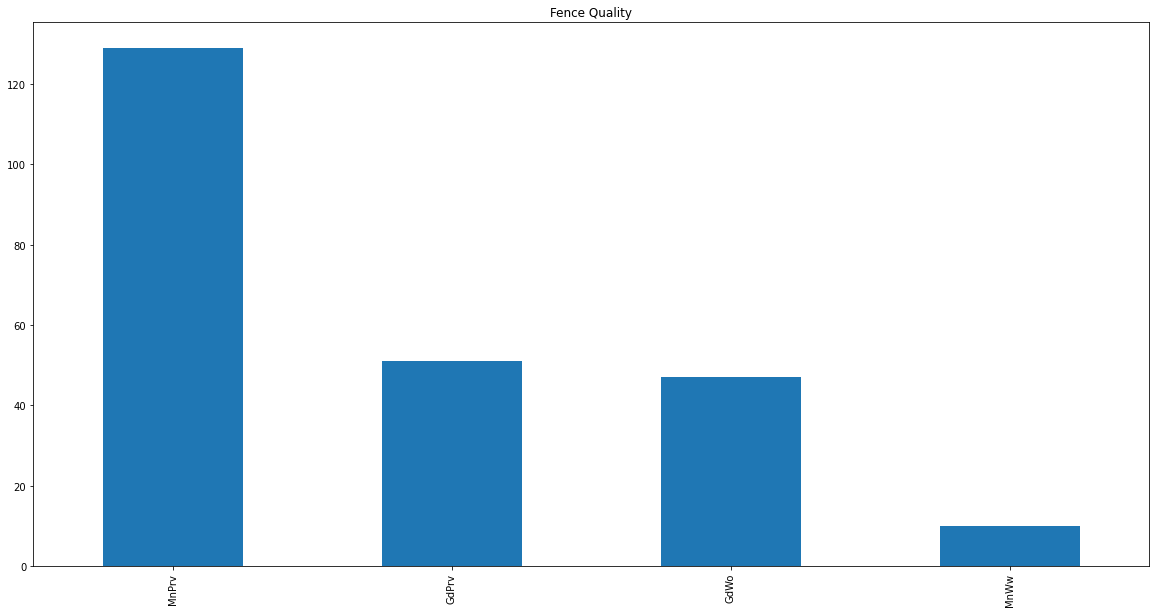

In [23]:
plt.subplot()
df_train['Fence'].value_counts().plot(kind='bar',title='Fence Quality',figsize=(20,10))

<AxesSubplot:title={'center':'Year Sold'}>

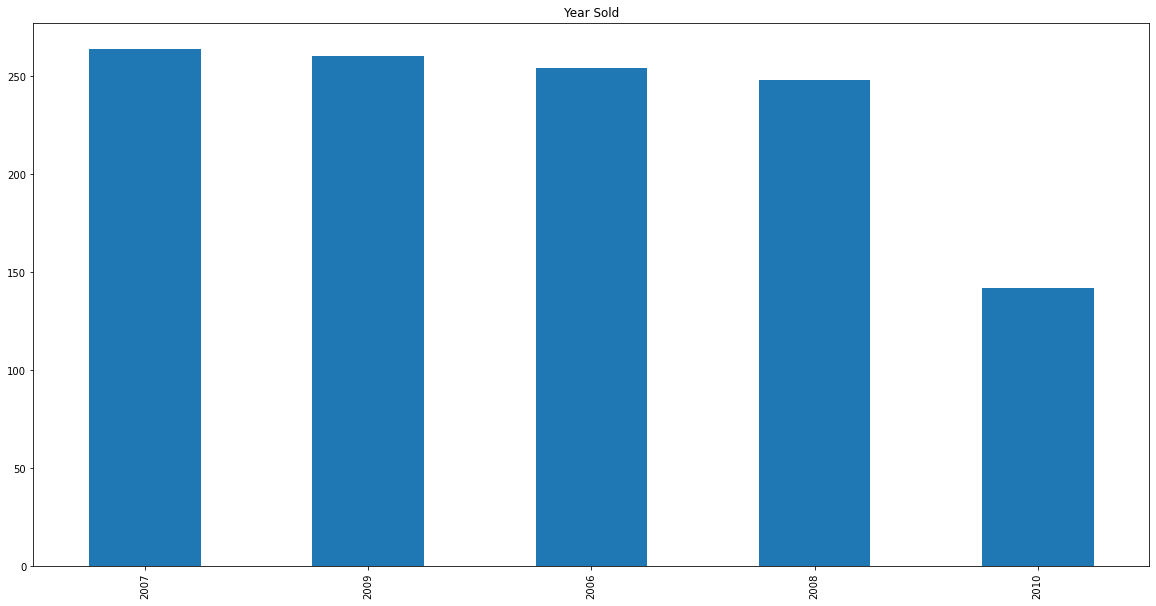

In [24]:
plt.subplot()
df_train['YrSold'].value_counts().plot(kind='bar',title='Year Sold',figsize=(20,10))

<AxesSubplot:title={'center':'Type of Sale'}>

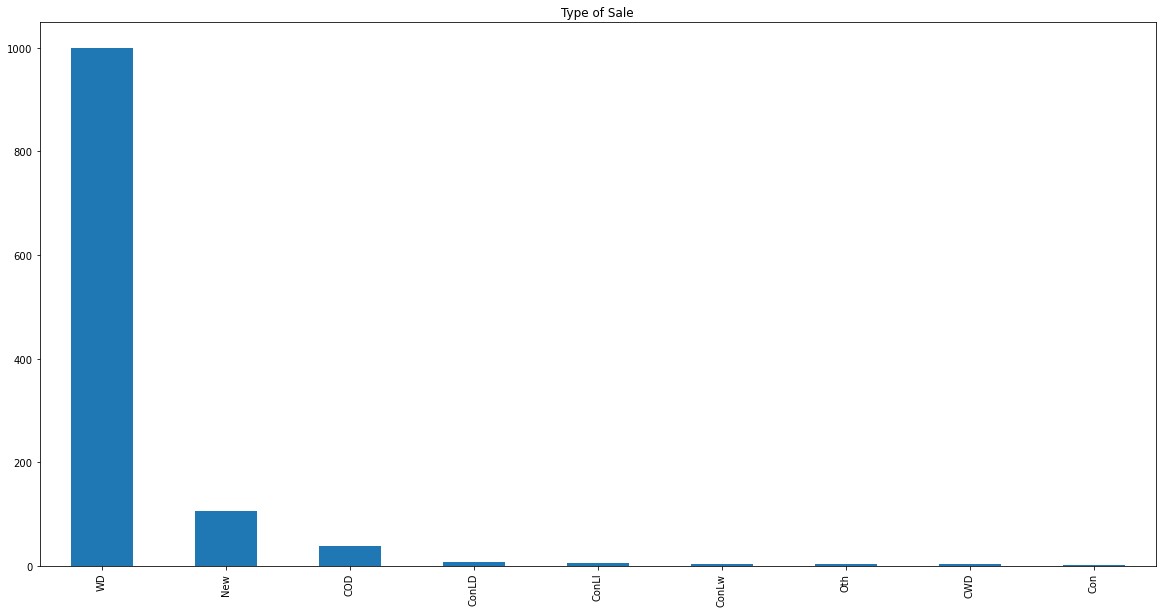

In [25]:
plt.subplot()
df_train['SaleType'].value_counts().plot(kind='bar',title='Type of Sale',figsize=(20,10))

<AxesSubplot:title={'center':'Condition of Sale'}>

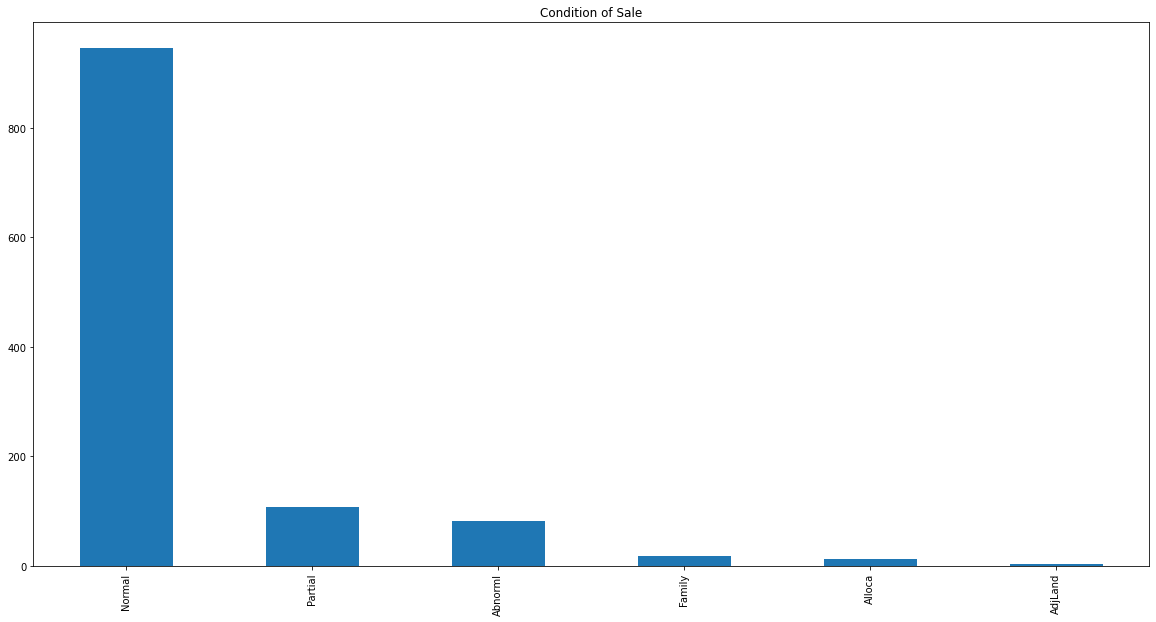

In [26]:
plt.subplot()
df_train['SaleCondition'].value_counts().plot(kind='bar',title='Condition of Sale',figsize=(20,10))

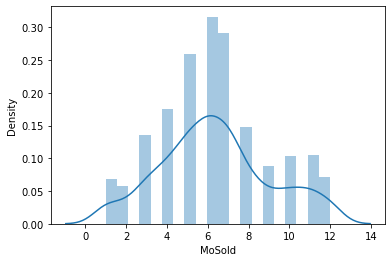

In [27]:
sns.distplot(df_train['MoSold']);

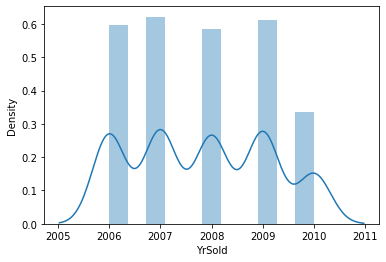

In [28]:
sns.distplot(df_train['YrSold']);

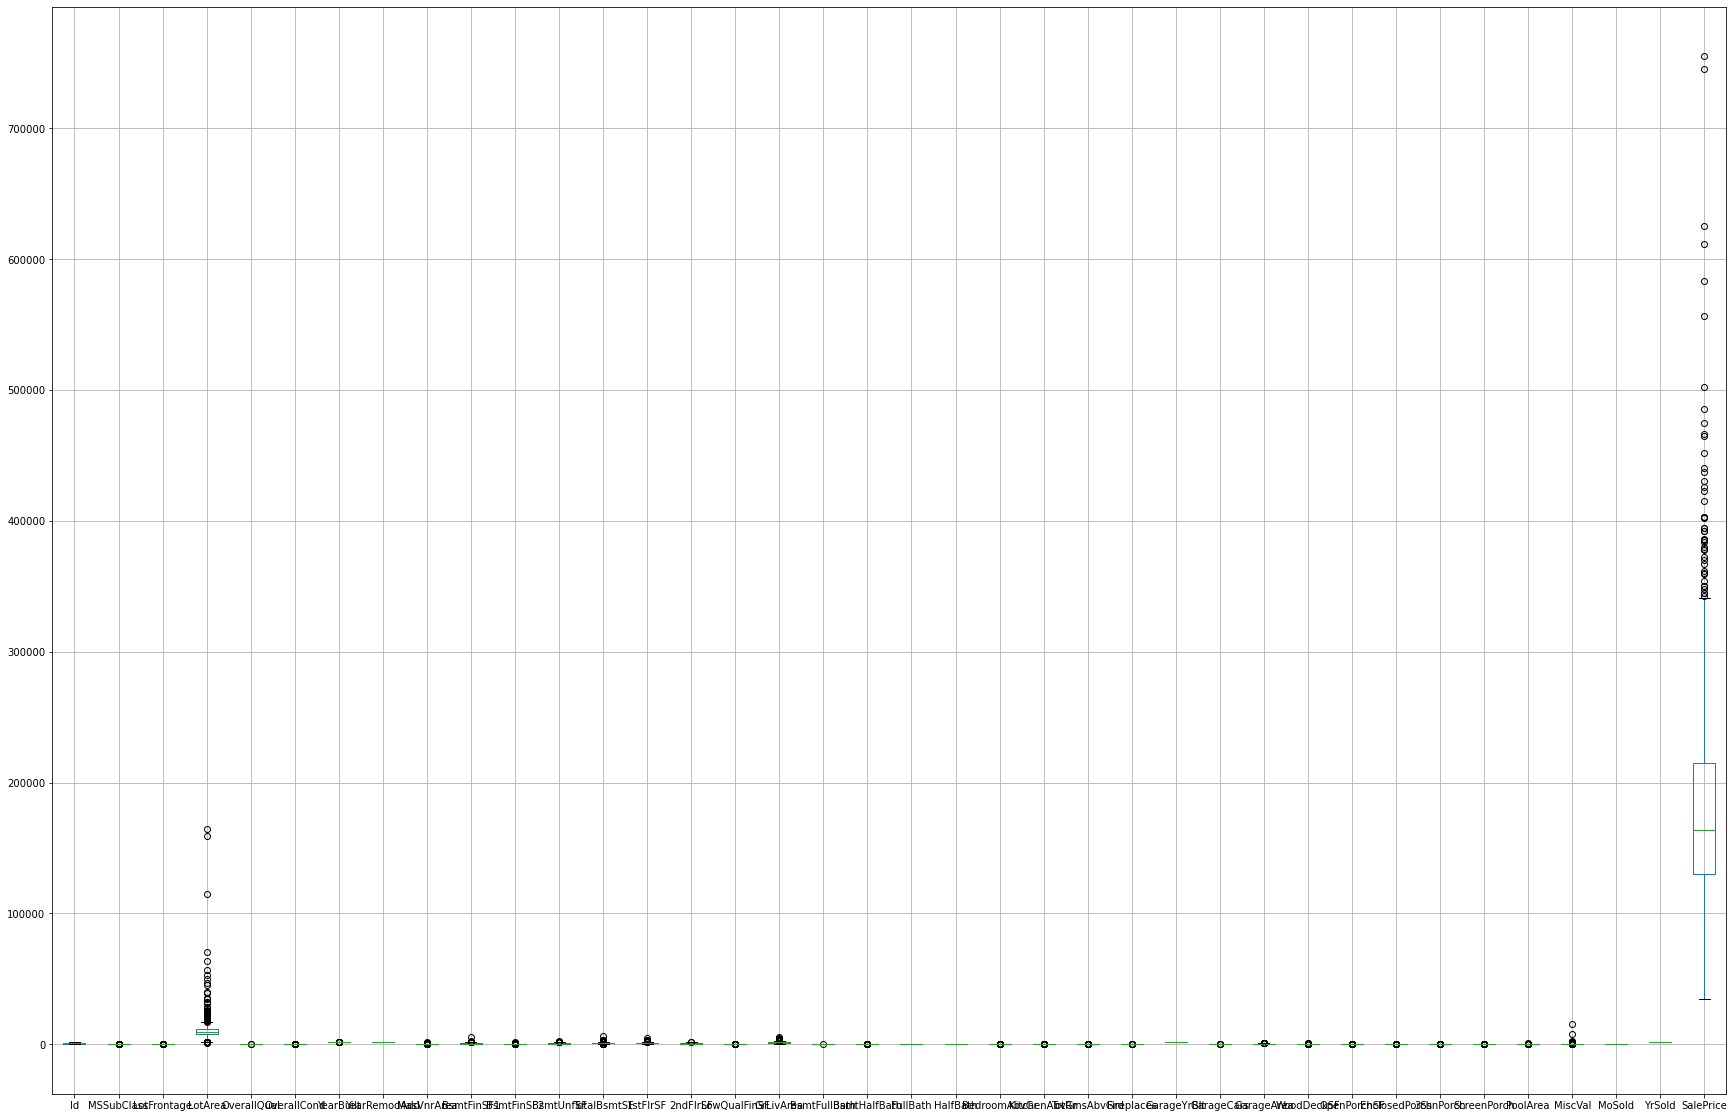

In [29]:
plt.figure(figsize=(30,20))
df_train.boxplot();

<AxesSubplot:>

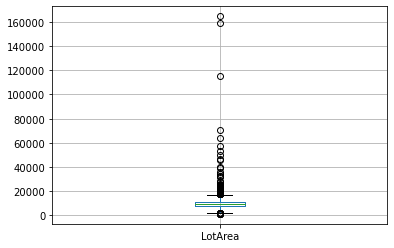

In [30]:
df_train.boxplot('LotArea')

<AxesSubplot:>

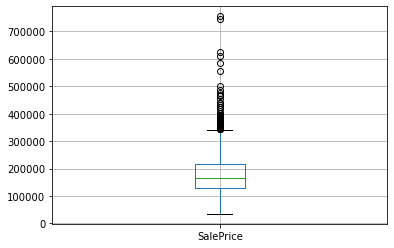

In [31]:
df_train.boxplot('SalePrice')

These are having outliers so, here  have to remove the outliers

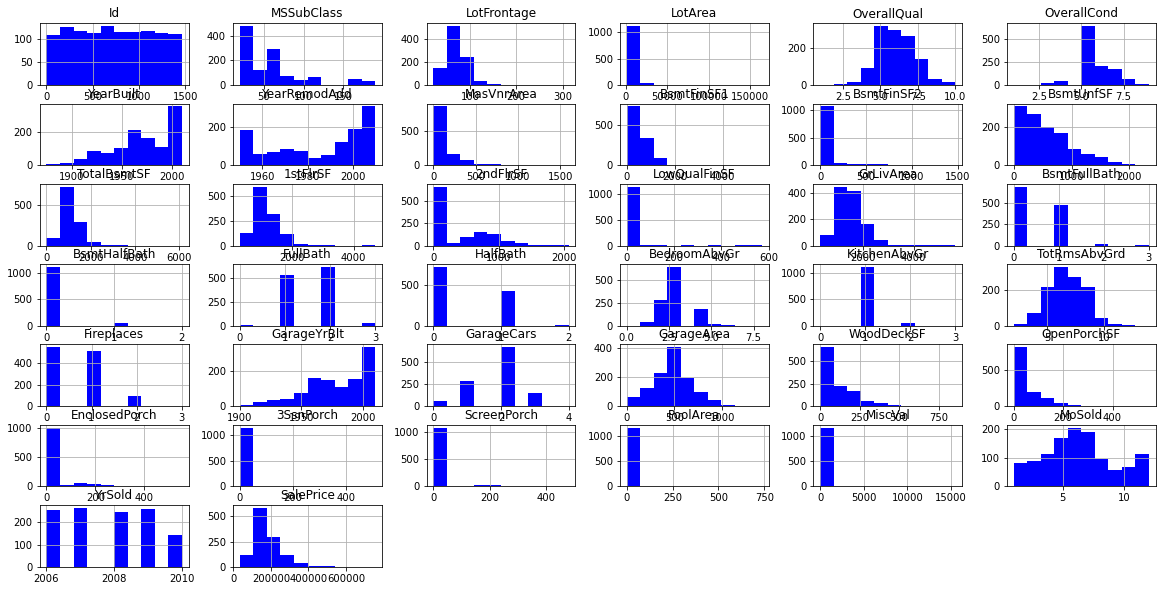

In [32]:
df_train.hist(color='b',figsize=(20,10))
plt.show()

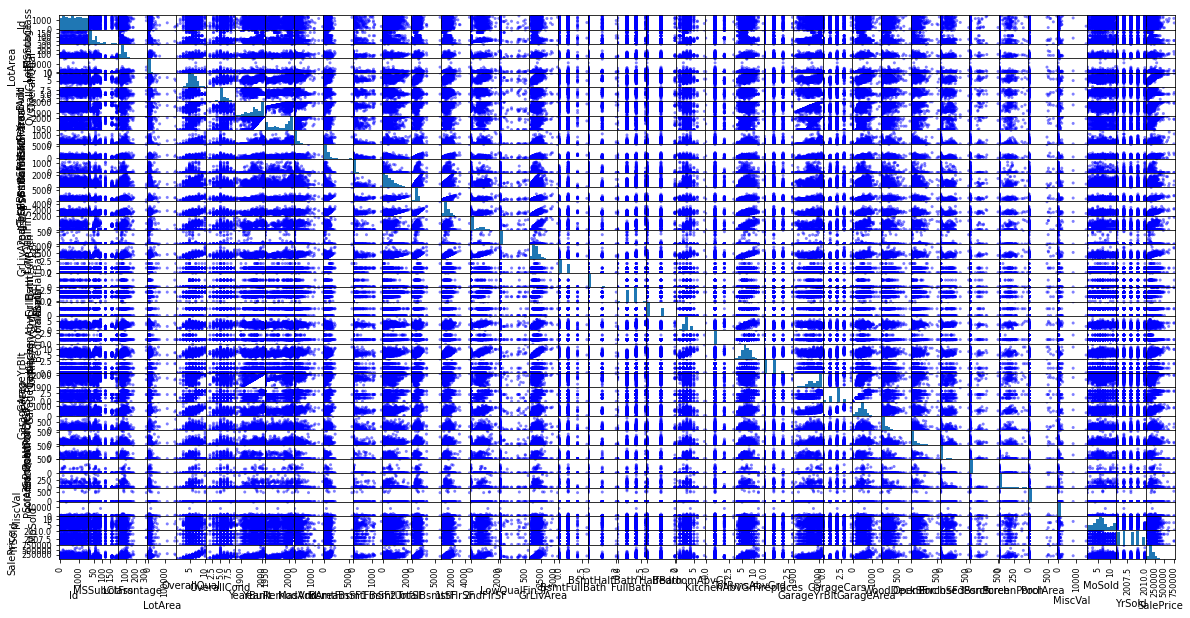

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_train,figsize=(20,10),color='b')
plt.show()

Distribution Plot

<AxesSubplot:xlabel='MoSold'>

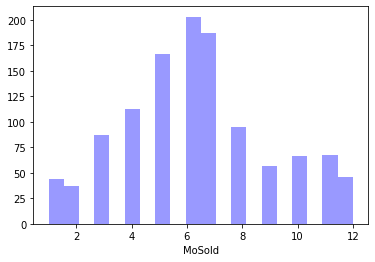

In [34]:
sns.distplot(df_train['MoSold'],kde=False, color='b')

<AxesSubplot:xlabel='YrSold'>

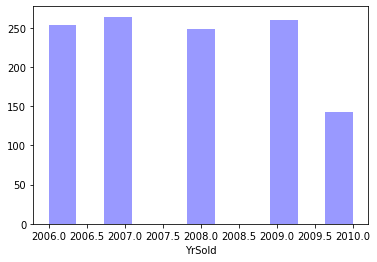

In [35]:
sns.distplot(df_train['YrSold'],kde=False,color='b')

<AxesSubplot:xlabel='MSSubClass'>

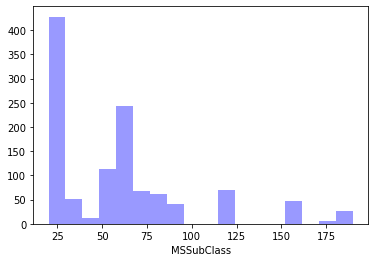

In [36]:
sns.distplot(df_train['MSSubClass'],kde=False,color='b')

<AxesSubplot:xlabel='LotFrontage'>

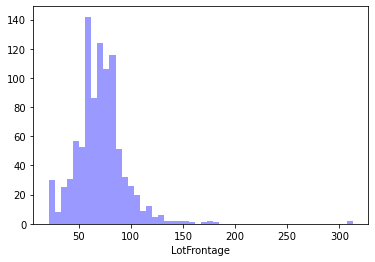

In [37]:
sns.distplot(df_train['LotFrontage'],kde=False,color='b')

<AxesSubplot:xlabel='LotArea'>

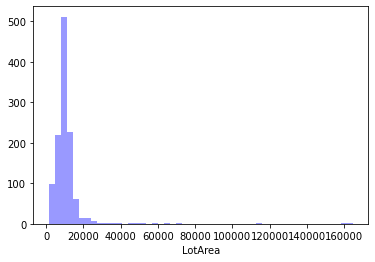

In [38]:
sns.distplot(df_train['LotArea'],kde=False,color='b')

<AxesSubplot:xlabel='YearBuilt'>

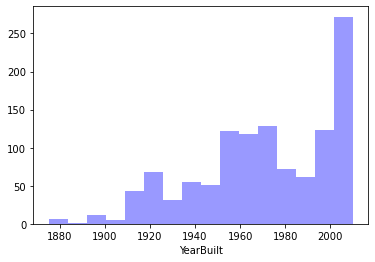

In [39]:
sns.distplot(df_train['YearBuilt'],kde=False,color='b')

<AxesSubplot:xlabel='MiscVal'>

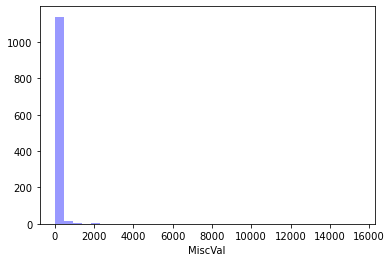

In [40]:
sns.distplot(df_train['MiscVal'],kde=False,color='b')

<AxesSubplot:xlabel='SalePrice'>

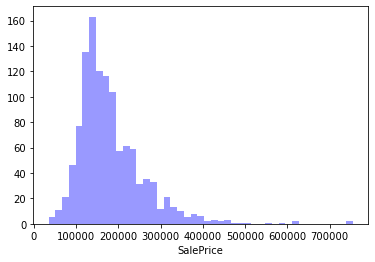

In [41]:
sns.distplot(df_train['SalePrice'],kde=False,color='b')

SCATTERPLOT

          MoSold    YrSold
MoSold  1.000000 -0.144536
YrSold -0.144536  1.000000


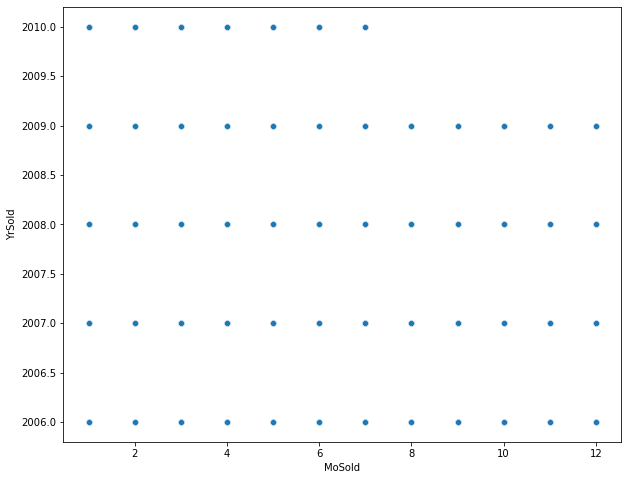

In [42]:
plt.figure(figsize=(10,8))
sns.scatterplot(df_train['MoSold'], df_train['YrSold'])
print(df_train[['MoSold' , 'YrSold']].corr())
plt.show()

             YrSold  SalePrice
YrSold     1.000000  -0.045508
SalePrice -0.045508   1.000000


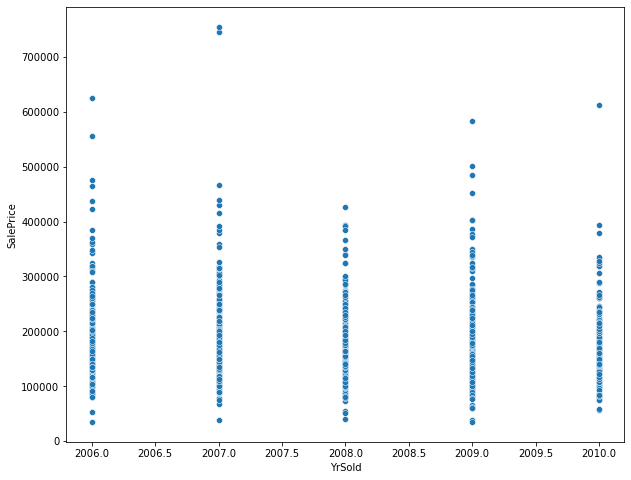

In [43]:
plt.figure(figsize=(10,8))
sns.scatterplot(df_train['YrSold'], df_train['SalePrice'])
print(df_train[['YrSold' , 'SalePrice']].corr())
plt.show()

             MoSold  SalePrice
MoSold     1.000000   0.072764
SalePrice  0.072764   1.000000


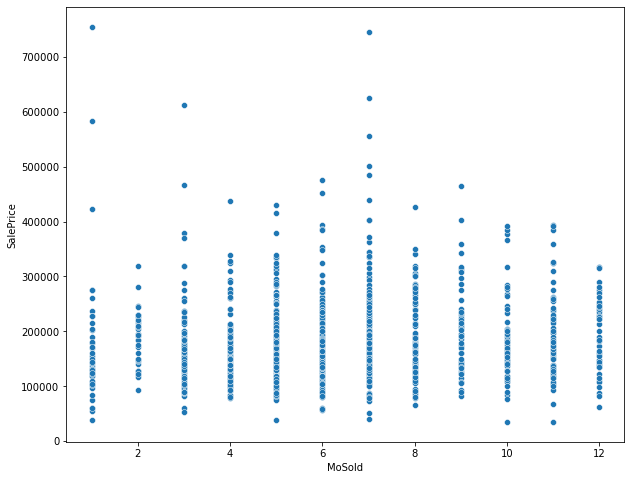

In [44]:
plt.figure(figsize=(10,8))
sns.scatterplot(df_train['MoSold'], df_train['SalePrice'])
print(df_train[['MoSold' , 'SalePrice']].corr())
plt.show()

COUNTPLOT OF TARGET COLUMN

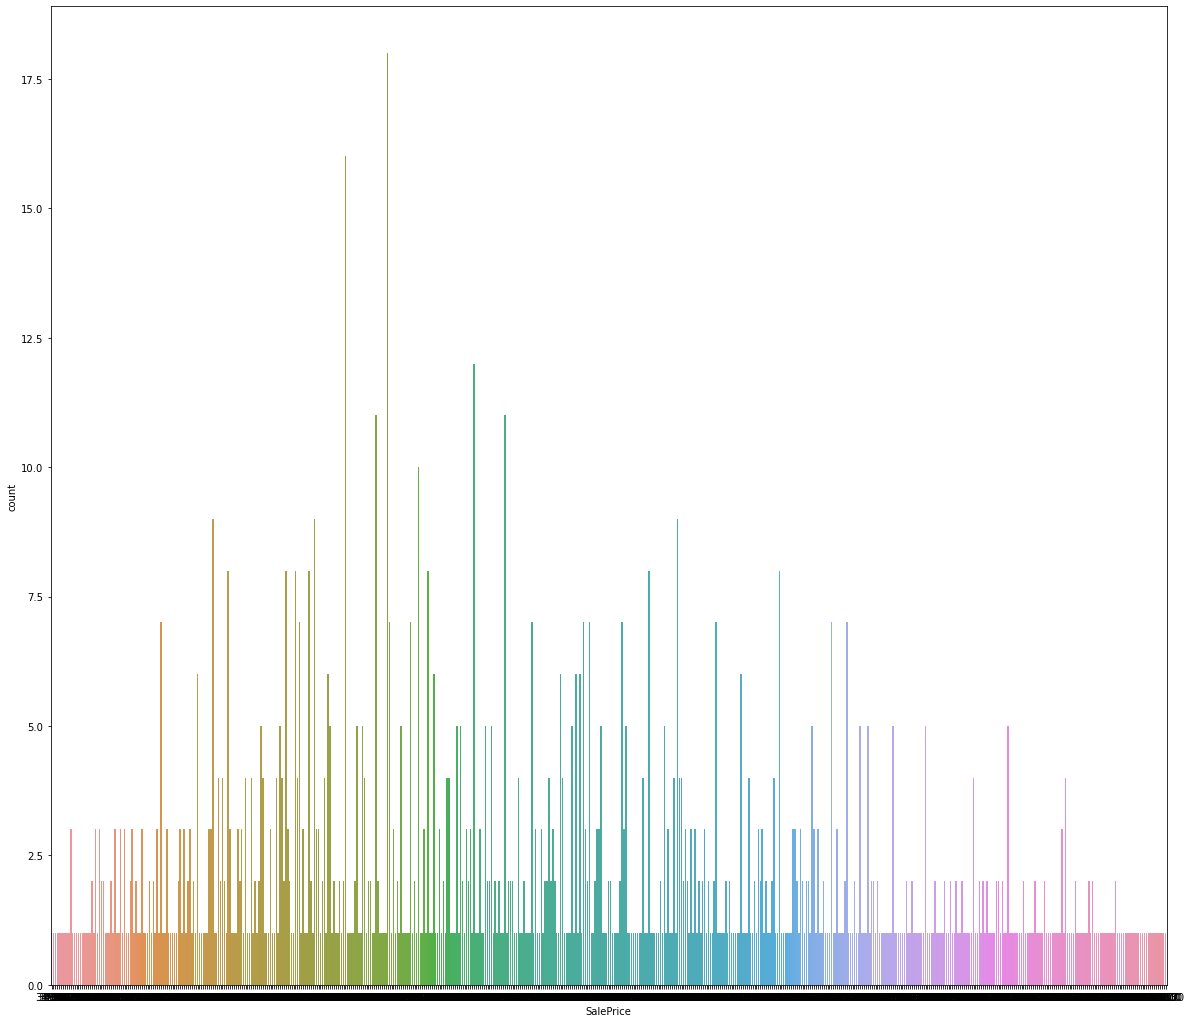

In [45]:
plt.figure(figsize=(20,18))
sns.countplot(df_train['SalePrice'])
plt.show()

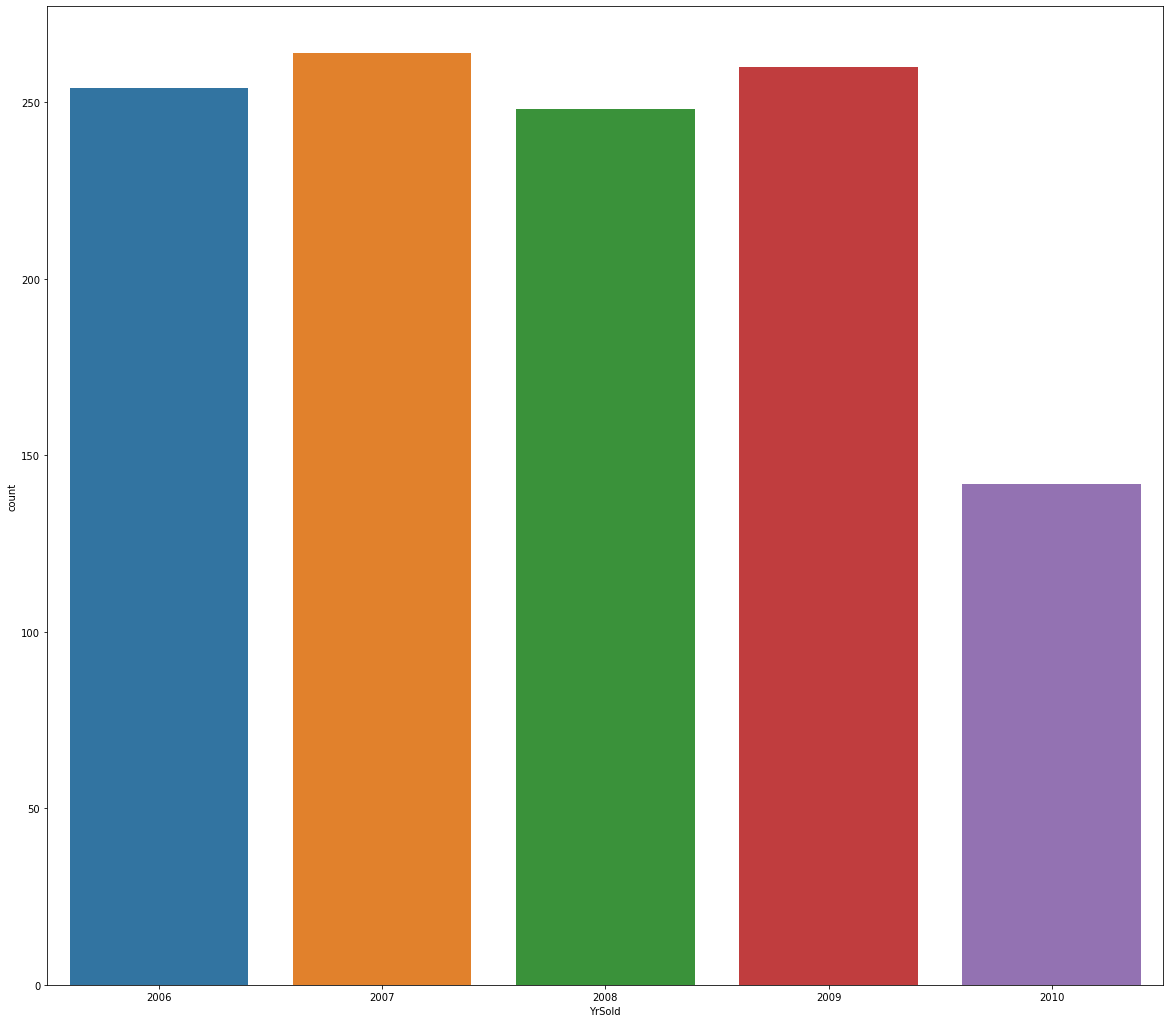

In [46]:
plt.figure(figsize=(20,18))
sns.countplot(df_train['YrSold'])
plt.show()

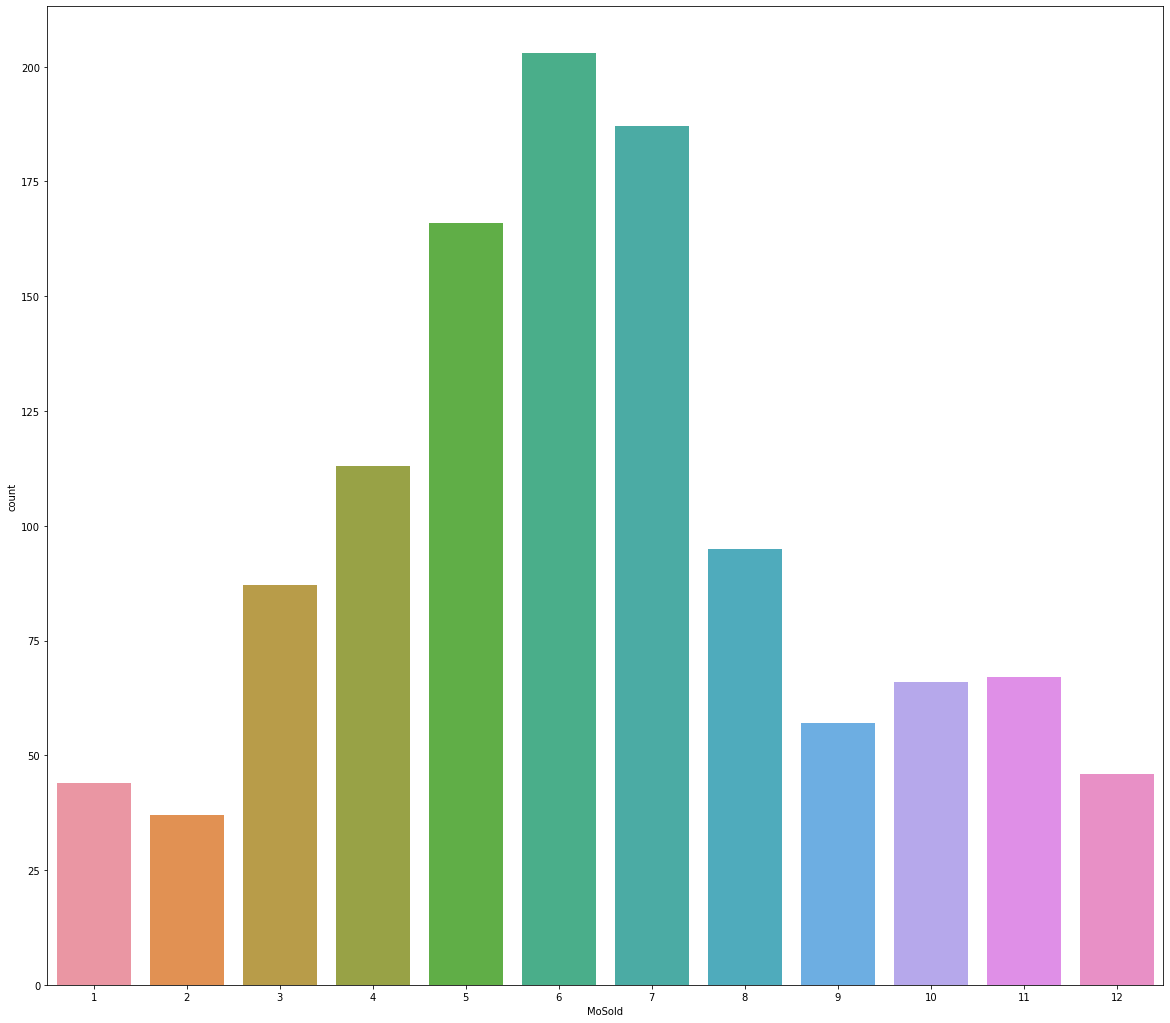

In [47]:
plt.figure(figsize=(20,18))
sns.countplot(df_train['MoSold'])
plt.show()

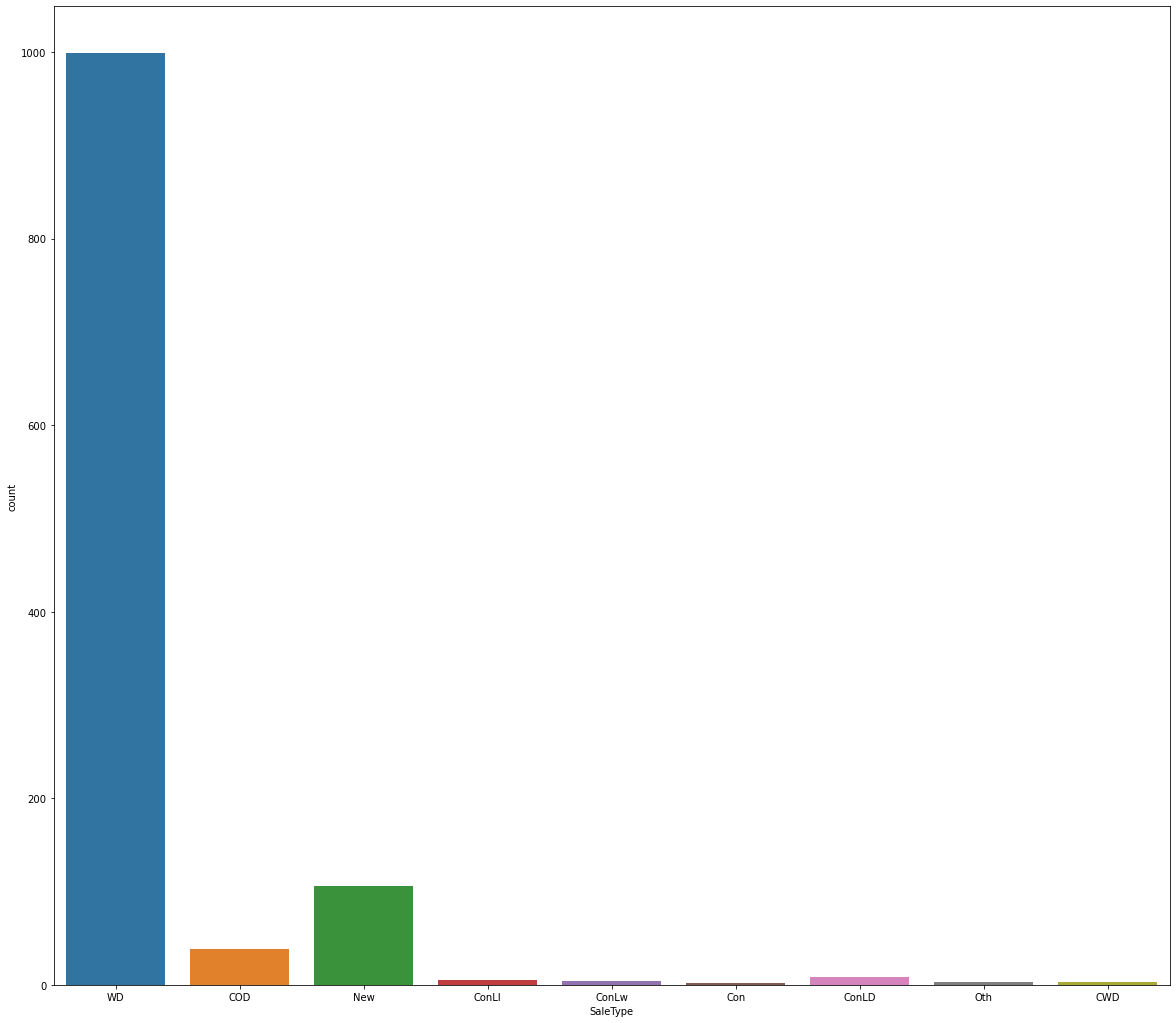

In [48]:
plt.figure(figsize=(20,18))
sns.countplot(df_train['SaleType'])
plt.show()

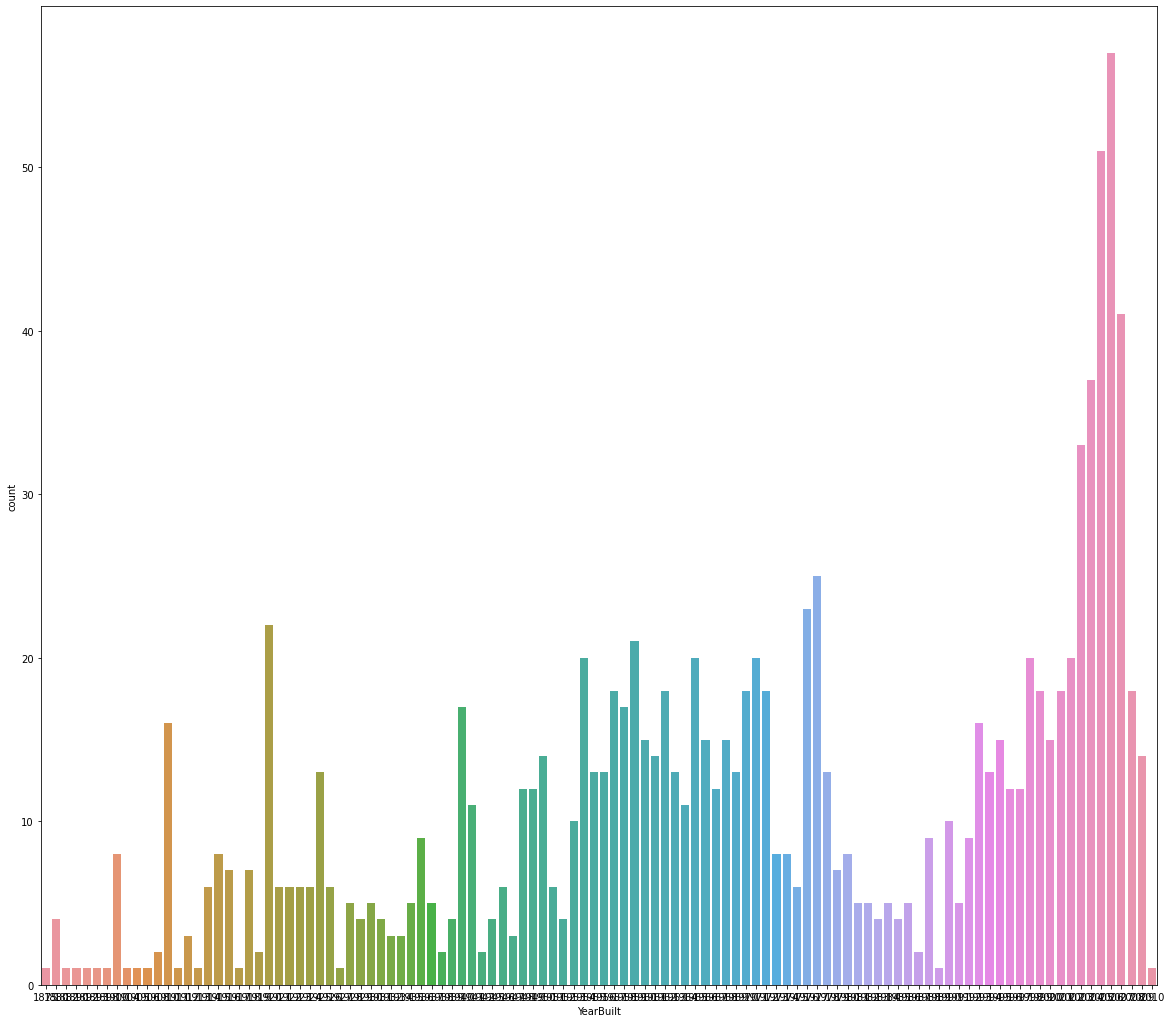

In [49]:
plt.figure(figsize=(20,18))
sns.countplot(df_train['YearBuilt'])
plt.show()

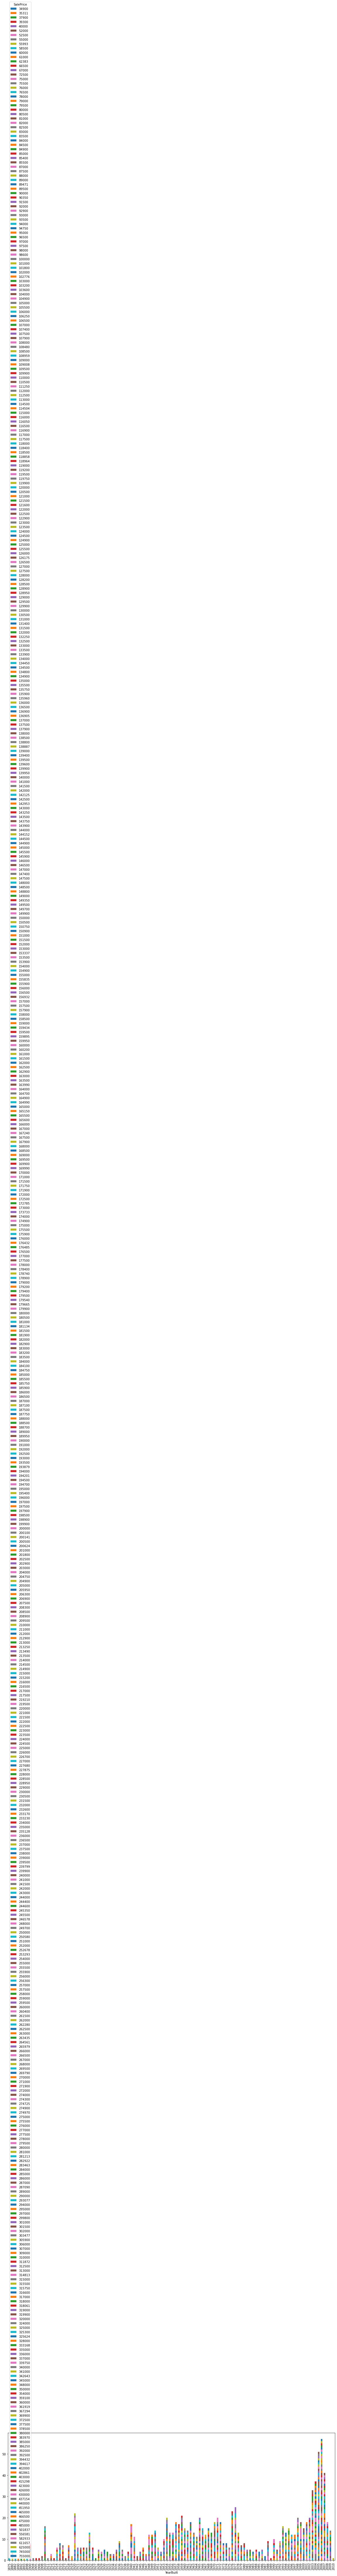

In [50]:
data=pd.crosstab(df_train['YearBuilt'], df_train['SalePrice'])
data.plot.bar(stacked=True,figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

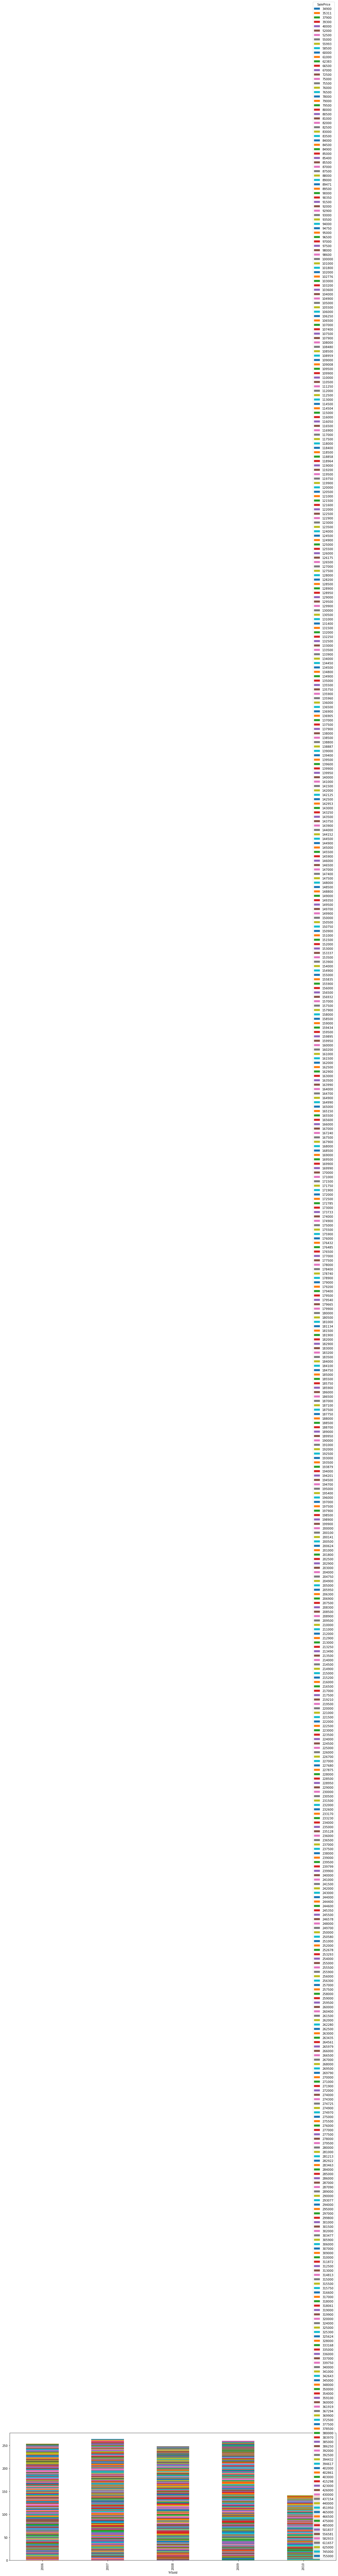

In [51]:
data=pd.crosstab(df_train['YrSold'], df_train['SalePrice'])
data.plot.bar(stacked=True,figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

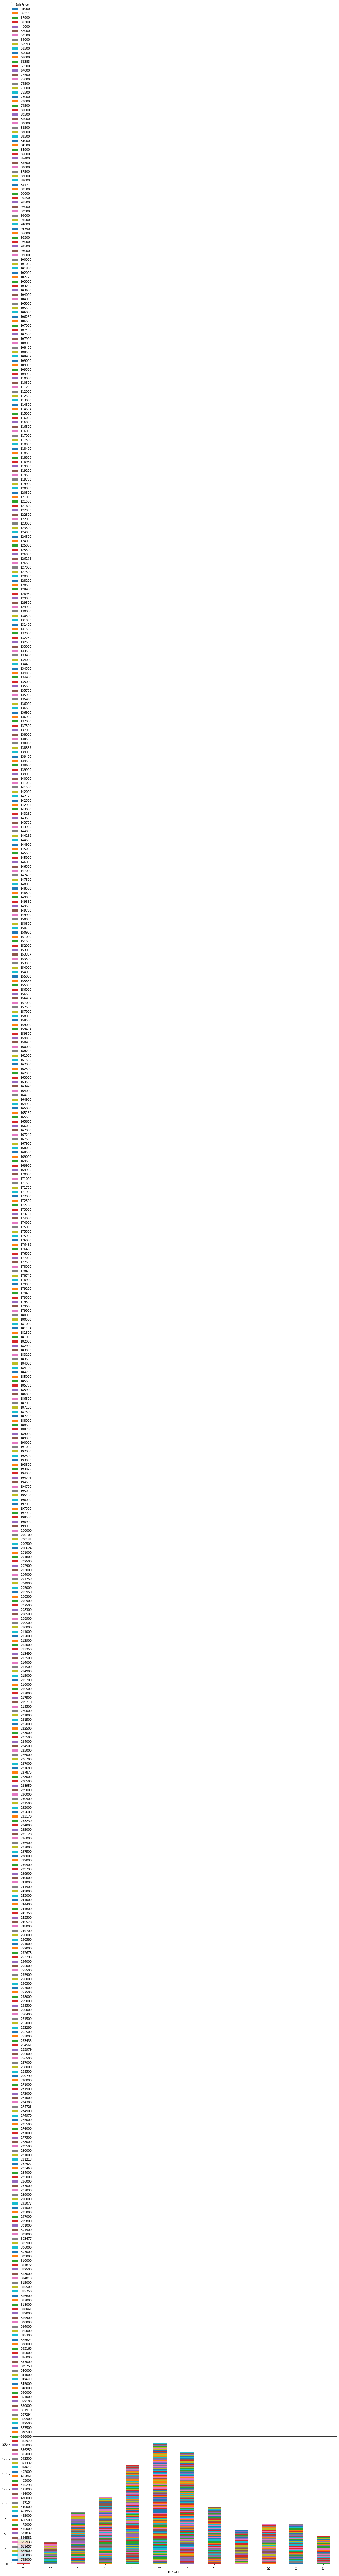

In [52]:
data=pd.crosstab(df_train['MoSold'], df_train['SalePrice'])
data.plot.bar(stacked=True,figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

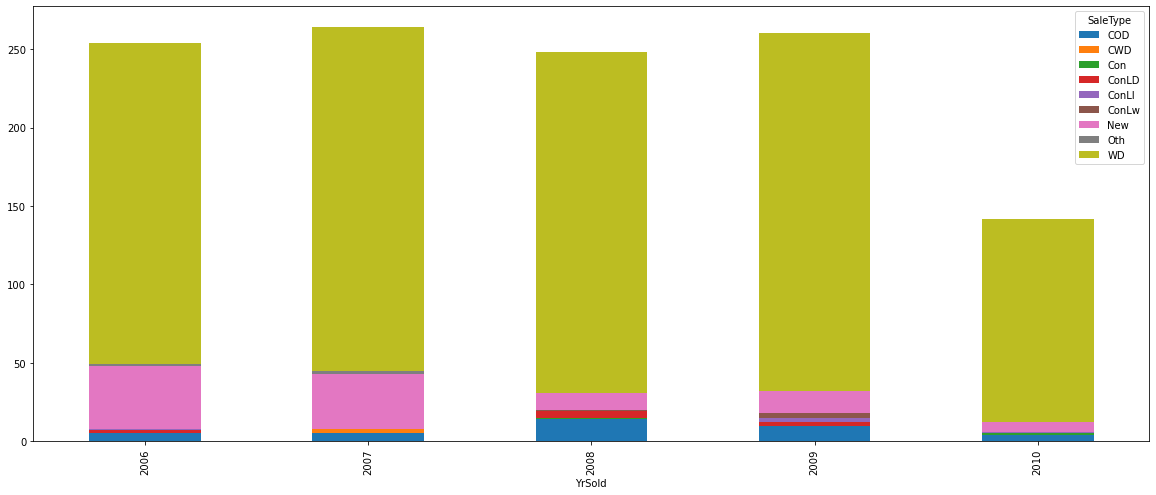

In [53]:
data=pd.crosstab(df_train['YrSold'], df_train['SaleType'])
data.plot.bar(stacked=True,figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

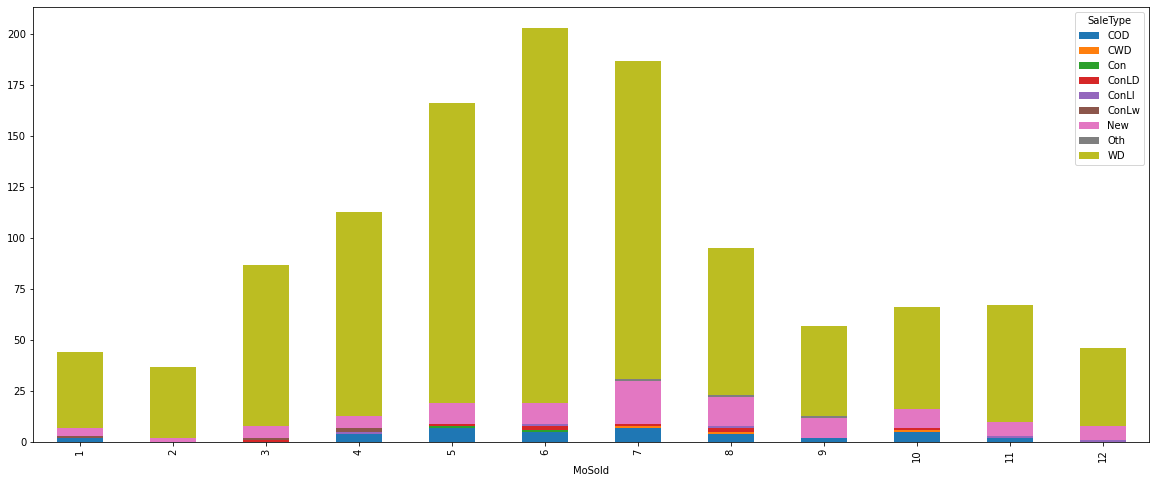

In [54]:
data=pd.crosstab(df_train['MoSold'], df_train['SaleType'])
data.plot.bar(stacked=True,figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

BOXPLOT

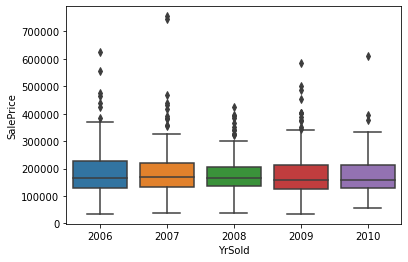

In [55]:
sns.boxplot(x='YrSold', y='SalePrice', data=df_train)
plt.show()

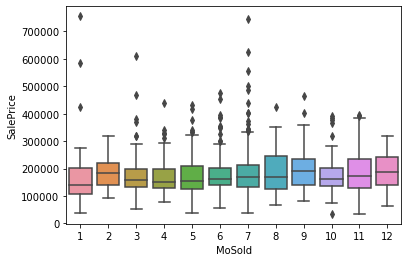

In [56]:
sns.boxplot(x='MoSold', y='SalePrice', data=df_train)
plt.show()

CORRELATION AMONG  NUMERIC ATTRIBUTES

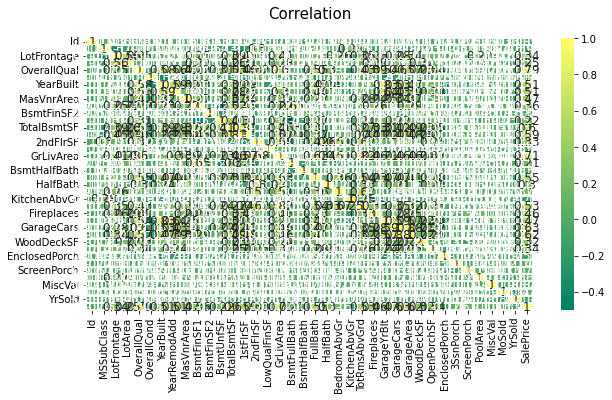

In [57]:
def correlation_heatmap(df_train):
    ax=plt.subplots(figsize=(10,5))
    colormap=sns.diverging_palette(220, 10, as_cmap = True)
    ax=sns.heatmap(df_train.corr(),cmap="summer",annot=True,linewidths=0.1,vmax=1.0,linecolor='white',annot_kws={'fontsize':12})
    plt.title('Correlation',y=1.05,size=15)

correlation_heatmap(df_train)

Parse the data

Text(0.5, 0, 'Sale Price')

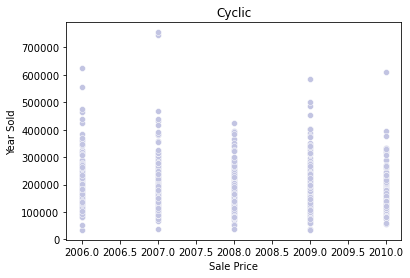

In [58]:
cyclic=sns.scatterplot(x='YrSold',y='SalePrice',data=df_train,color="#C2C4E2")
cyclic.set_title("Cyclic")
cyclic.set_ylabel("Year Sold")
cyclic.set_xlabel("Sale Price")

Text(0.5, 0, 'Sale Price')

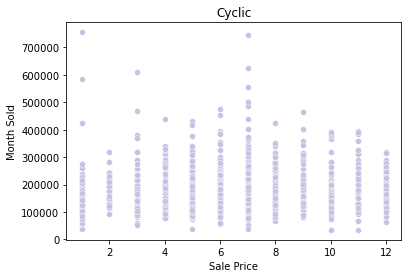

In [59]:
cyclic=sns.scatterplot(x='MoSold',y='SalePrice',data=df_train,color="#C2C4E2")
cyclic.set_title("Cyclic")
cyclic.set_ylabel("Month Sold")
cyclic.set_xlabel("Sale Price")

CATEGORICAL VARIALBES

In [60]:
c=(df_train.dtypes=="object")
object_cols=list(c[c].index)
print("categorical values: ")
print(object_cols)

categorical values: 
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [61]:
for i in object_cols:
    print(i, df_train[i].isnull().sum())

MSZoning 0
Street 0
Alley 1091
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 7
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 30
BsmtCond 30
BsmtExposure 31
BsmtFinType1 30
BsmtFinType2 31
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
KitchenQual 0
Functional 0
FireplaceQu 551
GarageType 64
GarageFinish 64
GarageQual 64
GarageCond 64
PavedDrive 0
PoolQC 1161
Fence 931
MiscFeature 1124
SaleType 0
SaleCondition 0


In [62]:
for i in object_cols:
    df_train[i].fillna(df_train[i].mode()[0],inplace=True)

NUMERICAL VARIABLES

In [63]:
n=(df_train.dtypes == "float64")
num_cols=list(n[n].index)
print("Numeric values: ")
print(num_cols)

Numeric values: 
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [64]:
for i in num_cols:
    print(i, df_train[i].isnull().sum())

LotFrontage 214
MasVnrArea 7
GarageYrBlt 64


In [65]:
for i in num_cols:
    df_train[i].fillna(df_train[i].median(),inplace=True)

In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          1168 non-null   object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

LINEPLOT

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

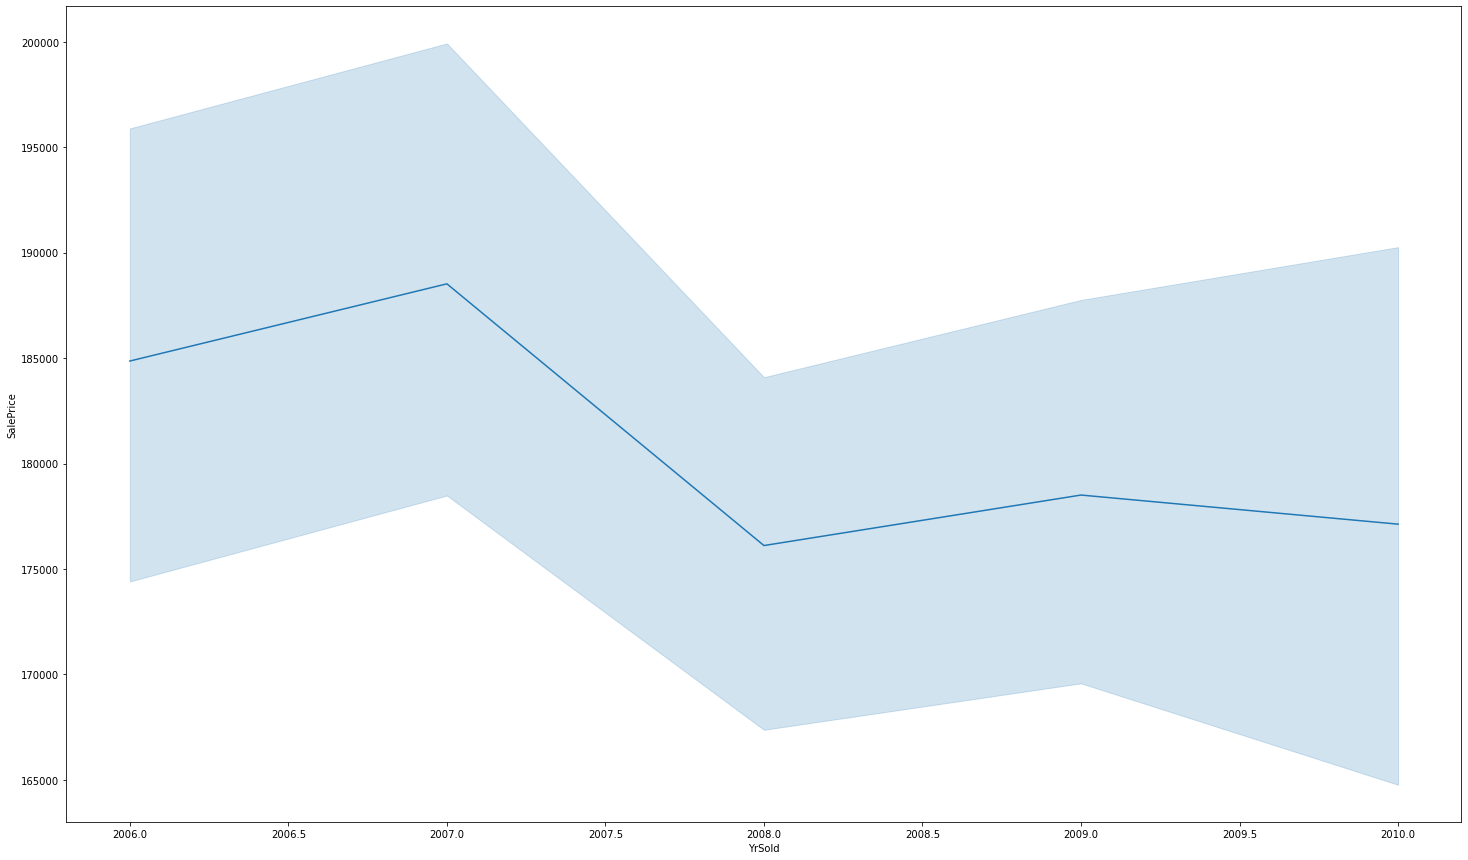

In [67]:
plt.figure(figsize=(25,15))
sns.lineplot(x='YrSold',y='SalePrice',data=df_train)

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

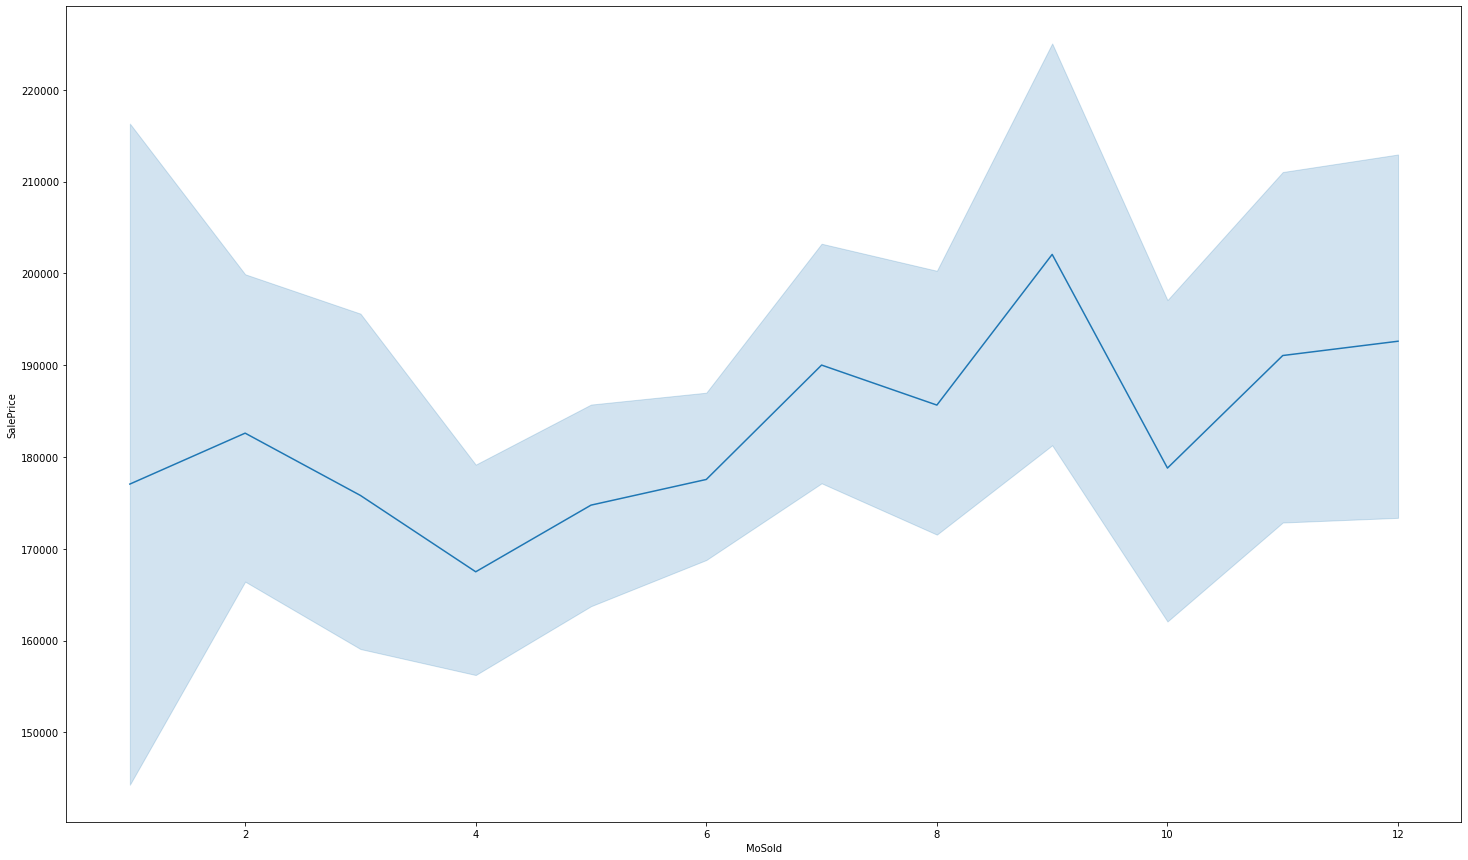

In [68]:
plt.figure(figsize=(25,15))
sns.lineplot(x='MoSold',y='SalePrice',data=df_train)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

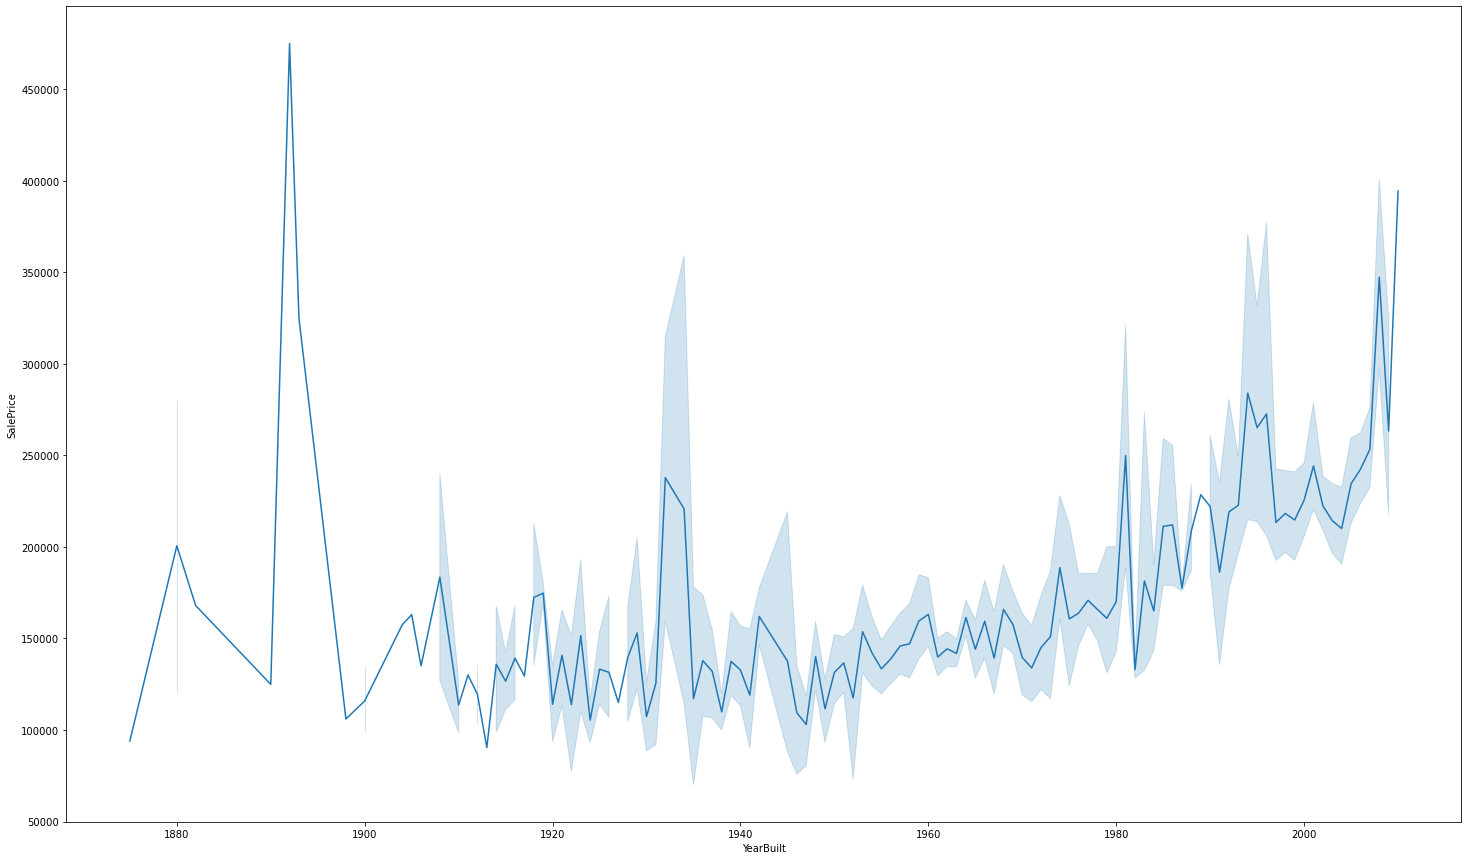

In [69]:
plt.figure(figsize=(25,15))
sns.lineplot(x='YearBuilt',y='SalePrice',data=df_train)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

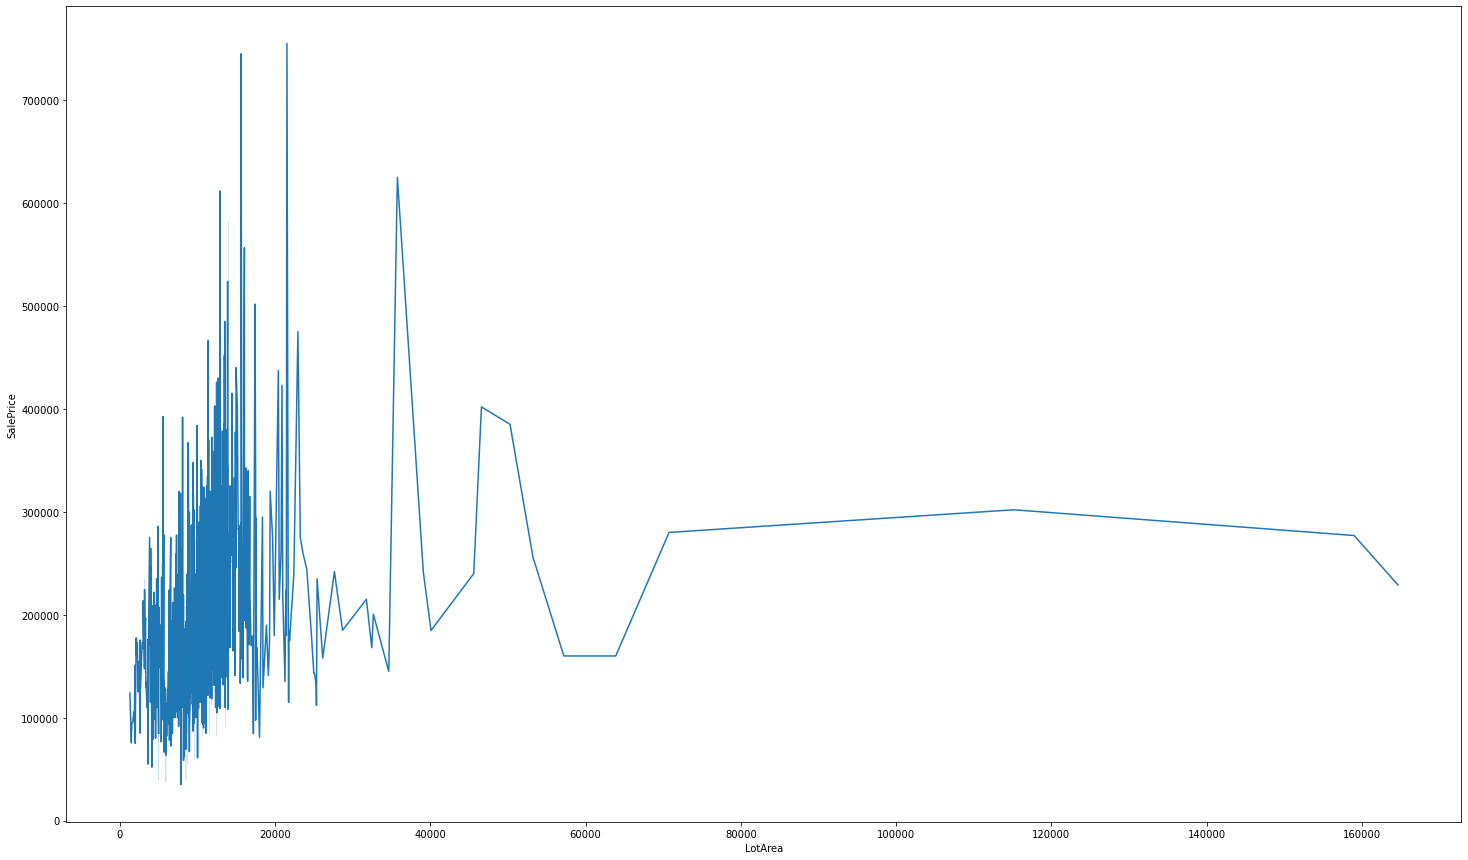

In [70]:
plt.figure(figsize=(25,15))
sns.lineplot(x='LotArea',y='SalePrice',data=df_train)

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

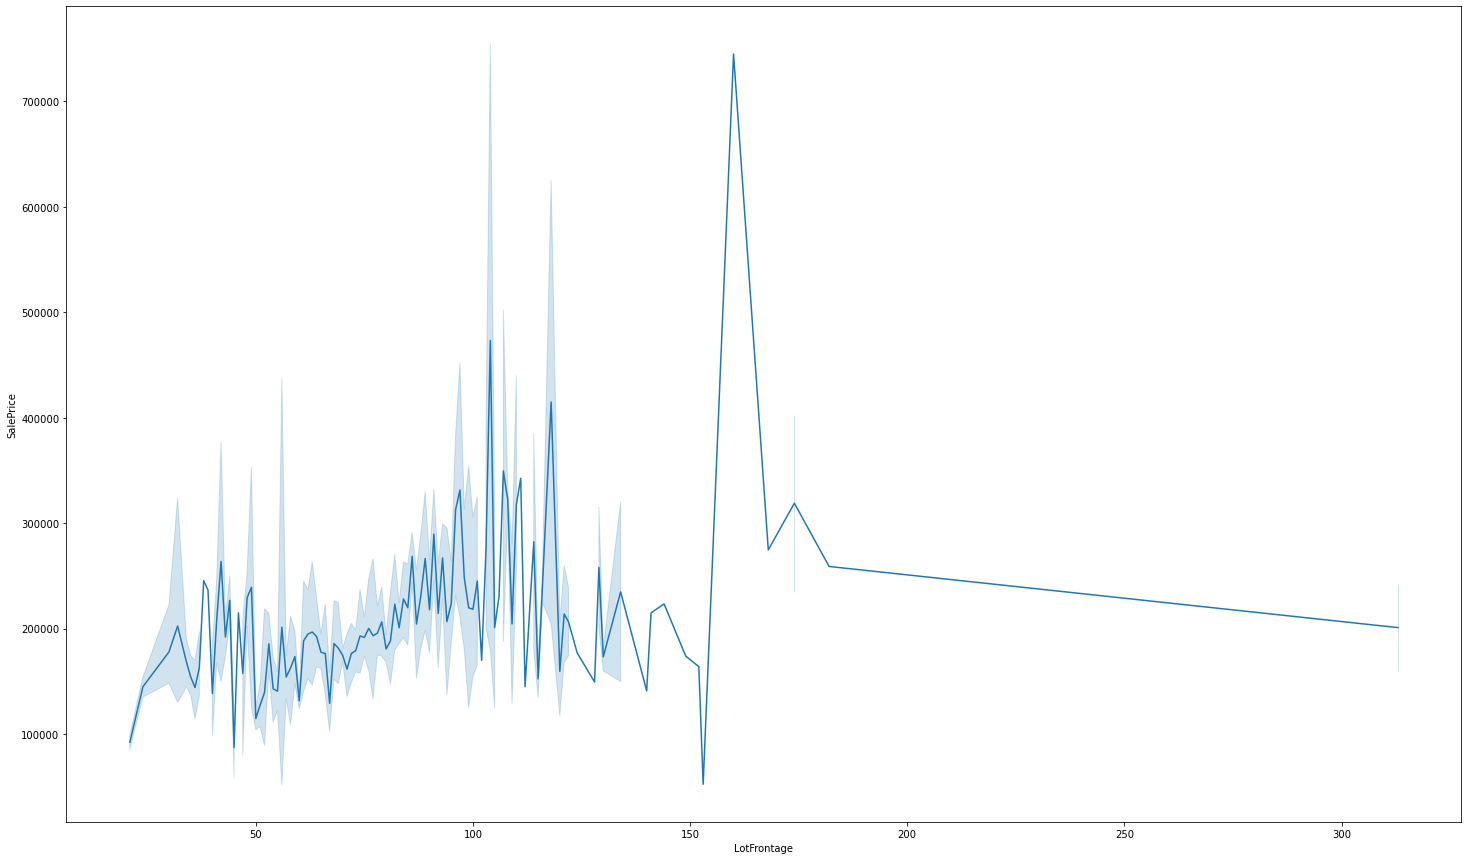

In [71]:
plt.figure(figsize=(25,15))
sns.lineplot(x='LotFrontage',y='SalePrice',data=df_train)

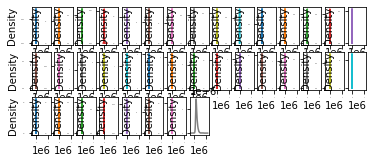

In [72]:
df_train.plot(kind='density',subplots=True,layout=(5,15),legend=False,fontsize=1);

COUNTPLOT

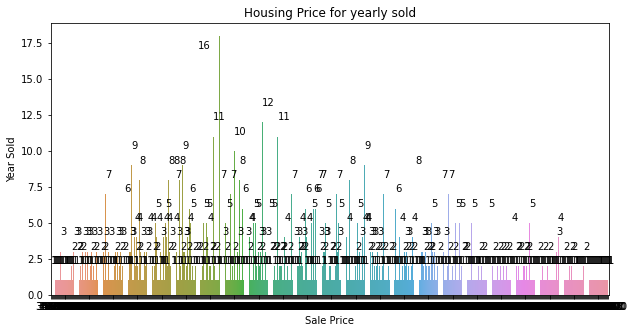

In [73]:
plt.figure(figsize=(10,5))
plt.title('Housing Price for yearly sold')
ax=sns.countplot(x='SalePrice',data=df_train)
plt.xlabel('Sale Price')
plt.ylabel('Year Sold')
for i  in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va='bottom',color='black')

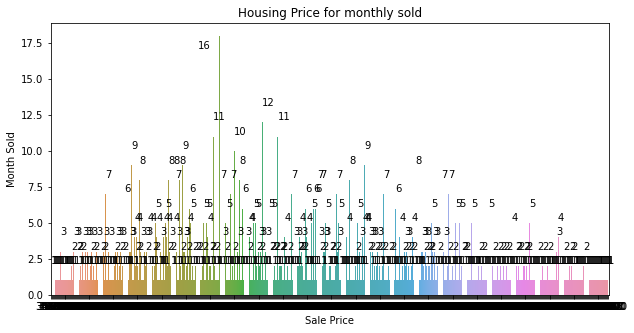

In [74]:
plt.figure(figsize=(10,5))
plt.title('Housing Price for monthly sold')
ax=sns.countplot(x='SalePrice',data=df_train)
plt.xlabel('Sale Price')
plt.ylabel('Month Sold')
for i  in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va='bottom',color='black')

RELPLOT

<Figure size 1080x720 with 0 Axes>

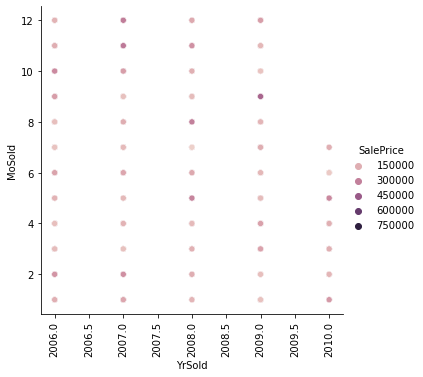

In [75]:
plt.figure(figsize=(15,10))
sns.relplot(x='YrSold', y='MoSold', hue='SalePrice',data=df_train)
plt.xticks(rotation=90);

<Figure size 1080x720 with 0 Axes>

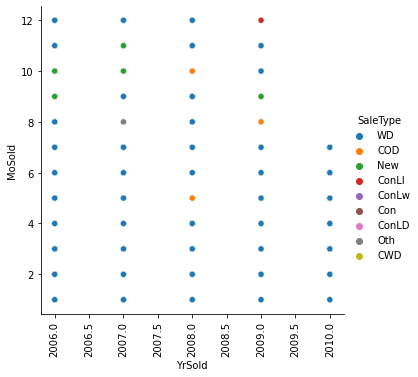

In [76]:
plt.figure(figsize=(15,10))
sns.relplot(x='YrSold', y='MoSold', hue='SaleType',data=df_train)
plt.xticks(rotation=90);

<AxesSubplot:>

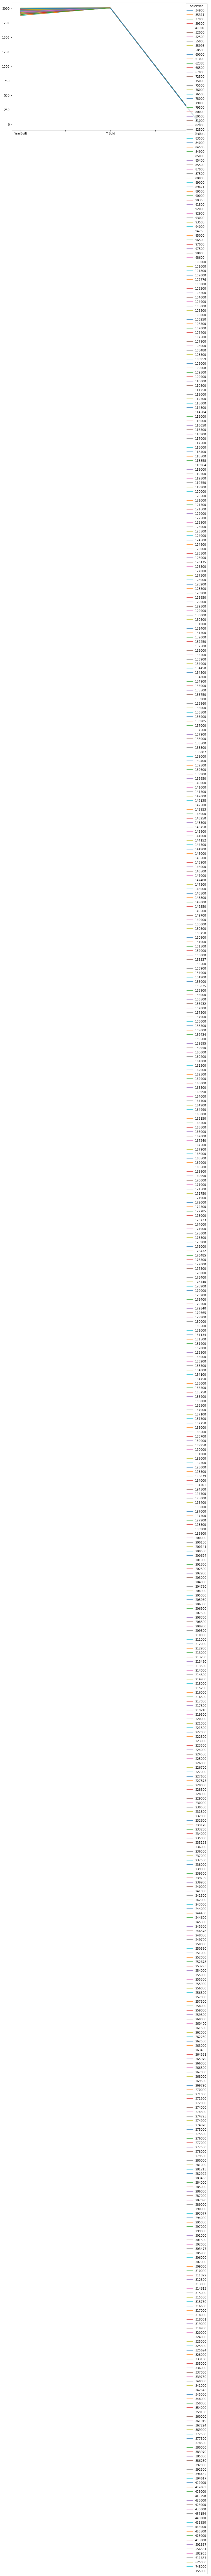

In [77]:
df_train.groupby('SalePrice')[['YearBuilt' , 'YrSold' , 'MoSold']].mean().T.plot(figsize=(12,8))

<AxesSubplot:>

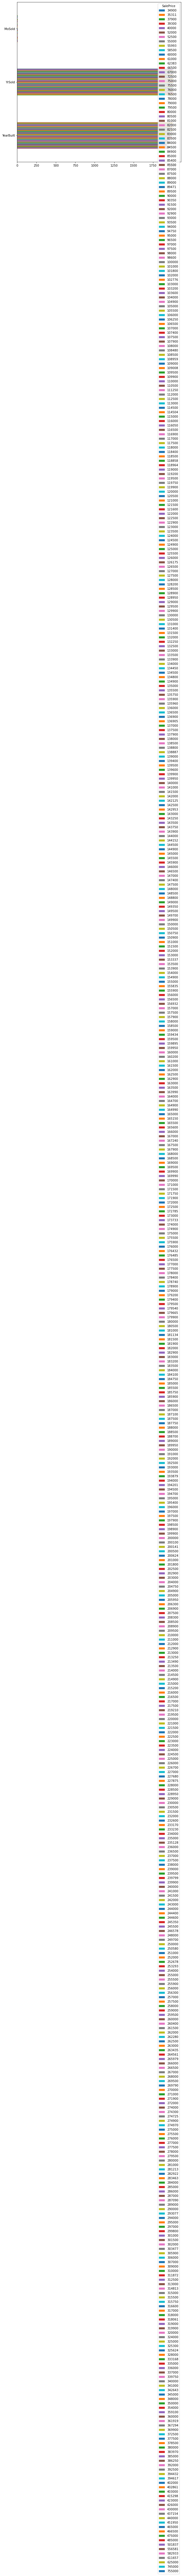

In [78]:
df_train.groupby('SalePrice')[['YearBuilt' , 'YrSold' , 'MoSold']].mean().T.plot(kind='barh',figsize=(10,10))

DATA PREPROCESSING

LABEL ENCODING

In [79]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in object_cols:
    df_train[i] = label_encoder.fit_transform(df_train[i])
    
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   int32  
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   int32  
 6   Alley          1168 non-null   int32  
 7   LotShape       1168 non-null   int32  
 8   LandContour    1168 non-null   int32  
 9   Utilities      1168 non-null   int32  
 10  LotConfig      1168 non-null   int32  
 11  LandSlope      1168 non-null   int32  
 12  Neighborhood   1168 non-null   int32  
 13  Condition1     1168 non-null   int32  
 14  Condition2     1168 non-null   int32  
 15  BldgType       1168 non-null   int32  
 16  HouseStyle     1168 non-null   int32  
 17  OverallQual    1168 non-null   int64  
 18  OverallC

dropping the attributes of data that target and extra columns show

In [80]:
from sklearn import preprocessing
features=df_train.drop(['SaleType','YearBuilt','YrSold','MoSold'],axis=1)
target=df_train['SaleType']
col_names=list(features.columns)
scaler=preprocessing.StandardScaler()
features=scaler.fit_transform(features)
features=pd.DataFrame(features,columns=col_names)
features.describe().T

count          mean       std        min       25%       50%  \
Id             1168.0  1.155849e-16  1.000428  -1.738385 -0.874164 -0.023165   
MSSubClass     1168.0  3.006062e-17  1.000428  -0.877042 -0.877042 -0.161440   
MSZoning       1168.0  2.620799e-17  1.000428  -4.762117 -0.021646 -0.021646   
LotFrontage    1168.0 -1.418077e-16  1.000428  -2.220499 -0.481811 -0.035994   
LotArea        1168.0  9.814257e-17  1.000428  -1.025816 -0.319787 -0.107471   
...               ...           ...       ...        ...       ...       ...   
Fence          1168.0  8.051018e-17  1.000428  -4.111558  0.260130  0.260130   
MiscFeature    1168.0 -1.040157e-15  1.000428 -21.592593  0.037037  0.037037   
MiscVal        1168.0  1.178899e-16  1.000428  -0.087131 -0.087131 -0.087131   
SaleCondition  1168.0  1.416770e-16  1.000428  -3.390060  0.207932  0.207932   
SalePrice      1168.0 -1.669998e-16  1.000428  -1.853722 -0.646274 -0.221091   

                    75%        max  
Id             0.854278   1.768981  
MSSubClass     0.315629   3.178041  
MSZoning      -0.021646   1.558511  
LotFrontage    0.376387  10.797369  
LotArea        0.115121  17.219345  
...                 ...        ...  
Fence          0.260130   2.445975  
MiscFeature    0.037037  10.851852  
MiscVal       -0.087131  28.456316  
SaleCondition  0.207932   1.107430  
SalePrice      0.423957   7.253200  

[77 rows x 8 columns]

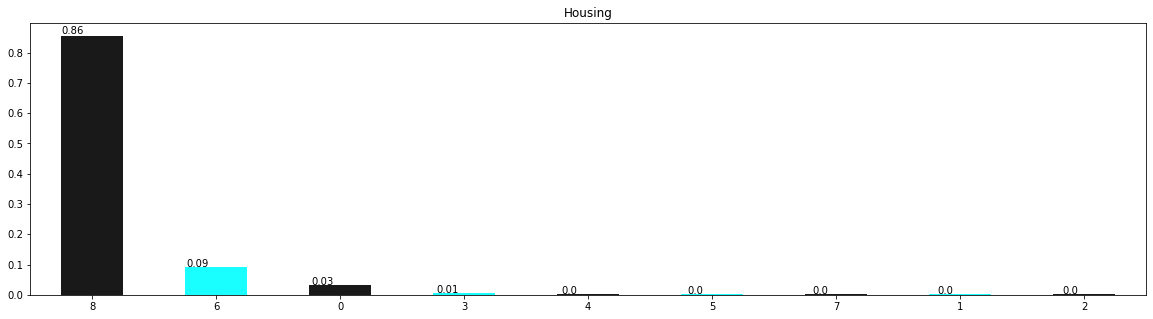

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
ax=df_train.SaleType.value_counts(normalize=True).plot(kind='bar', color=['black', 'cyan'], alpha=0.9, rot=0)
plt.title('Housing')
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x() * 1.01, i.get_height() * 1.01))
    
plt.show()  

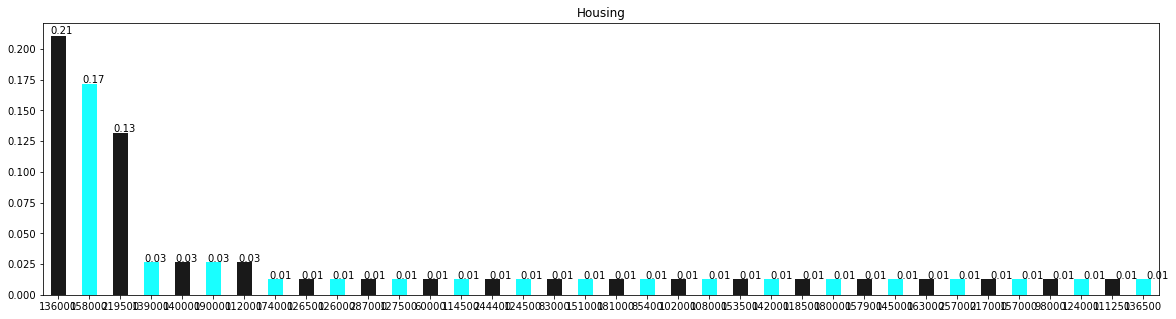

In [82]:
from sklearn.utils import resample

no=df_train[df_train.SaleType == 0]
yes=df_train[df_train.SaleType == 1]
yes_oversampled=resample(yes, replace=True, n_samples=len(no), random_state=42)
oversampled = pd.concat([no, yes_oversampled])

plt.figure(figsize=(20,5))

ax=oversampled.SalePrice.value_counts(normalize=True).plot(kind='bar', color=['black', 'cyan'], alpha=0.9, rot=0)
plt.title('Housing')
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x() * 1.01, i.get_height() * 1.01))
    
plt.show()   

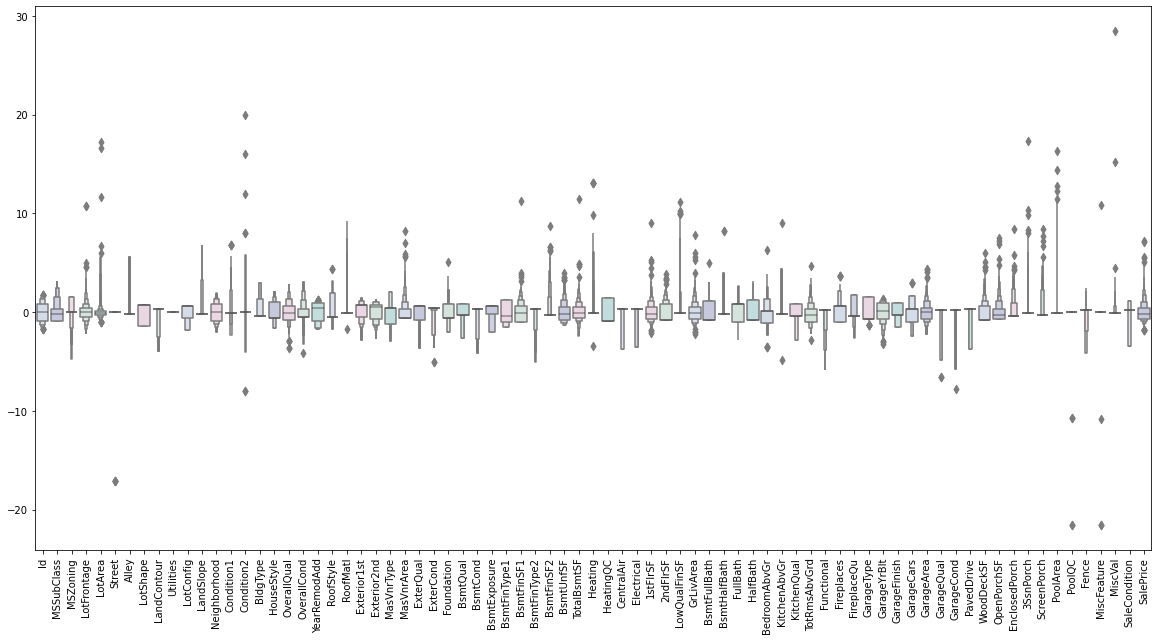

In [83]:
color=["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data=features,palette=color)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

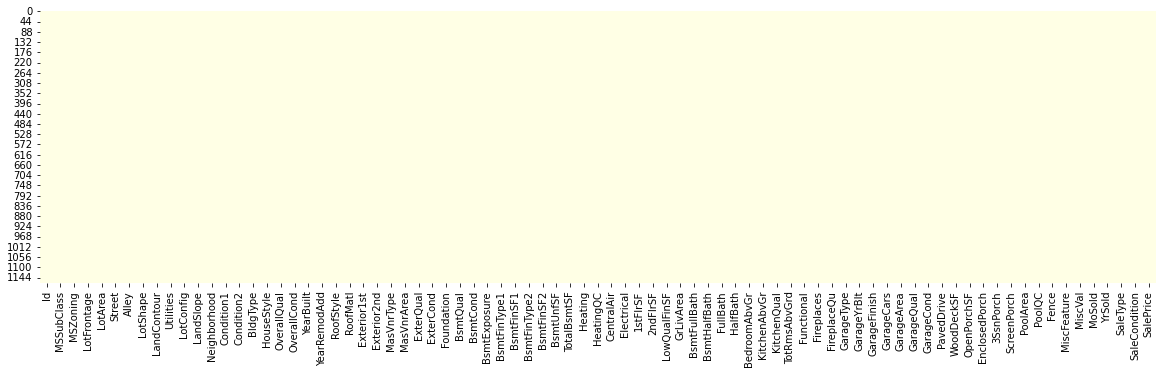

In [84]:
plt.figure(figsize=(20,5))
sns.heatmap(df_train.isnull(),cbar=False,cmap='YlGn')

In [85]:
df_train.select_dtypes(include=['object']).columns

Index([], dtype='object')

LABEL ENCODER

convert categorical features  to continous features

In [86]:
from sklearn.preprocessing import LabelEncoder
LE={}
for col in df_train.select_dtypes(include=['object']).columns: 
    LE[col] = LabelEncoder()
    df_train[col]=LE[col].fit_transform(oversampled[col])

In [87]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed=df_train.copy(deep=True)
mice_imputer=IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(df_train)

Outliers With IQR

In [88]:
Q1=MiceImputed.quantile(0.25)
Q3=MiceImputed.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Id                 719.00
MSSubClass          50.00
MSZoning             0.00
LotFrontage         19.25
LotArea           3894.00
                   ...   
MoSold               3.00
YrSold               2.00
SaleType             0.00
SaleCondition        0.00
SalePrice        84625.00
Length: 81, dtype: float64


In [89]:
type(df_train)

pandas.core.frame.DataFrame

REMOVE OUTLIERS


In [90]:
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(61, 81)

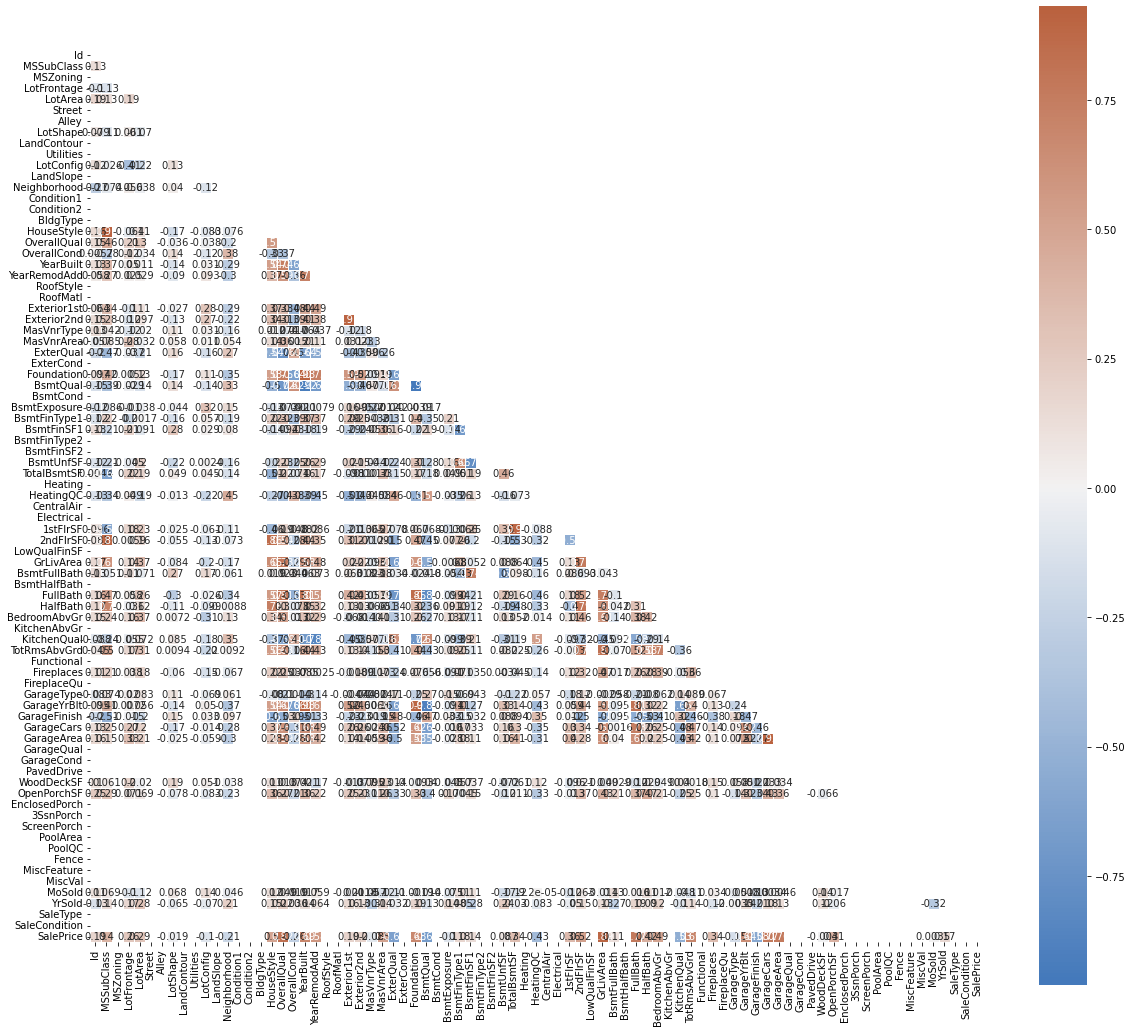

In [91]:
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

BUILDING THE MODELS

In [92]:
from sklearn.model_selection import train_test_split
X=features.drop(["SalePrice"],axis=1)
y=features["SalePrice"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X.shape

(1168, 76)

In [93]:
# Standardizing data
from sklearn import preprocessing
r_scaler=preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data=pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [94]:
#Feature Importance using Filter Method(Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:, modified_data.columns != 'SaleType']
y = modified_data[['SaleType']]
selector = SelectKBest(chi2, k=10)
selector.fit(X,y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition', 'SalePrice'],
      dtype='object')


In [95]:
 from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('SalePrice', axis=1)
y=MiceImputed['SalePrice']
selector = SelectFromModel(rf(n_estimators=100,random_state=0))
selector.fit(X,y)
support=selector.get_support()
features=X.loc[:, support].columns.tolist()
print(features)
print(rf(n_estimators=100,random_state=0).fit(X,y).feature_importances_)

['Id', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']
[0.05267003 0.0117117  0.         0.04106547 0.04265951 0.
 0.         0.01911562 0.         0.         0.0172111  0.
 0.03031927 0.         0.         0.         0.01238238 0.0223779
 0.01108547 0.03448339 0.03736514 0.         0.         0.01564907
 0.01478152 0.0126629  0.02412993 0.00858037 0.         0.00792731
 0.00644515 0.         0.00856683 0.0180171  0.02673433 0.
 0.         0.04845066 0.03787325 0.         0.01180163 0.
 0.         0.03810163 0.02780638 0.         0.03930125 0.0115658
 0.         0.00603655 0.00866191 0.01127403 0.         0.00648149
 0.0204413  0.         0.01570049 0.

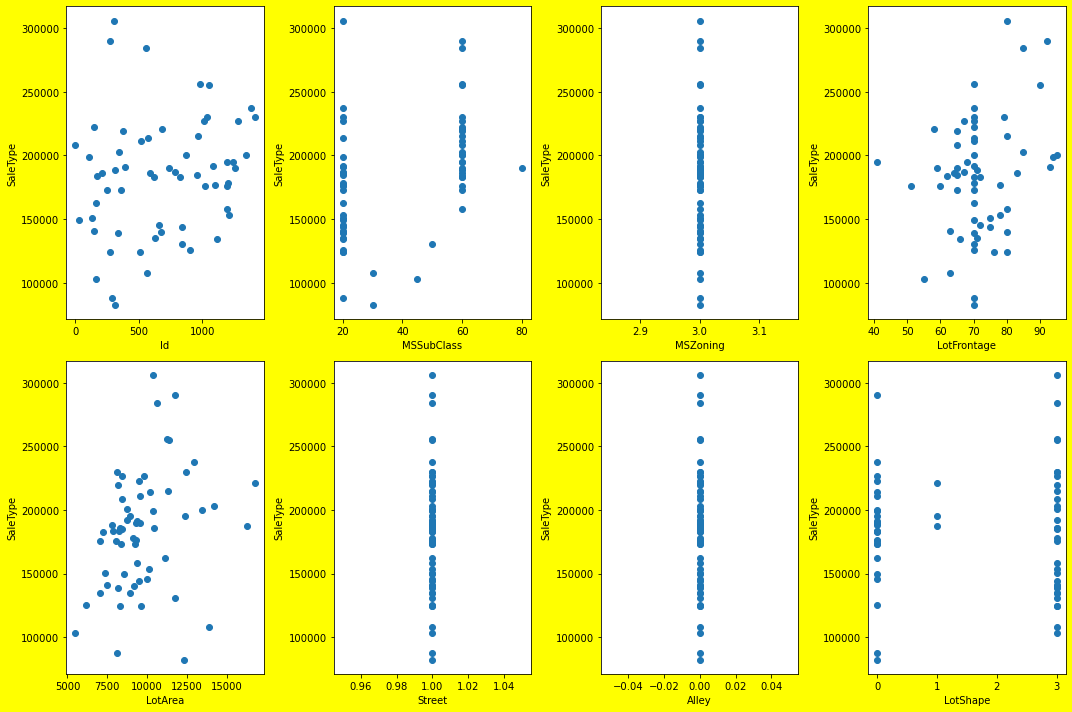

In [96]:
# Visualizing relationship
plt.figure(figsize=(15,10), facecolor= 'yellow')
plotnumber  =  1

for column in X:
    if plotnumber<=8  :
        aX  =  plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('SaleType',fontsize=10)
    plotnumber+=1
plt.tight_layout()    

the relationship between the dependent and independent variables look fairly linear. Thus, our linearity assumption is satisfied

In [97]:
y=df_train['SalePrice']
X=df_train.drop(columns=['SalePrice'])

In [98]:
y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

In [99]:
X

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     127         120         3         70.0     4928       1      0   
1     889          20         3         95.0    15865       1      0   
2     793          60         3         92.0     9920       1      0   
3     110          20         3        105.0    11751       1      0   
4     422          20         3         70.0    16635       1      0   
...   ...         ...       ...          ...      ...     ...    ...   
1163  289          20         3         70.0     9819       1      0   
1164  554          20         3         67.0     8777       1      0   
1165  196         160         3         24.0     2280       1      0   
1166   31          70         0         50.0     8500       1      1   
1167  617          60         3         70.0     7861       1      0   

      LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  \
0            0            3          0  ...            0         0       2   
1            0            3          0  ...          224         0       2   
2            0            3          0  ...            0         0       2   
3            0            3          0  ...            0         0       2   
4            0            3          0  ...            0         0       2   
...        ...          ...        ...  ...          ...       ...     ...   
1163         0            3          0  ...            0         0       2   
1164         3            3          0  ...            0         0       2   
1165         3            3          0  ...            0         0       2   
1166         3            3          0  ...            0         0       2   
1167         0            3          0  ...            0         0       2   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         2            2        0       2    2007         8              4  
1         2            2        0      10    2007         8              4  
2         2            2        0       6    2007         8              4  
3         2            2        0       1    2010         0              4  
4         2            2        0       6    2009         8              4  
...     ...          ...      ...     ...     ...       ...            ...  
1163      2            2        0       2    2010         8              4  
1164      2            2        0       5    2009         8              4  
1165      2            2        0       7    2009         8              4  
1166      2            2        0       7    2008         8              4  
1167      2            2        0       6    2006         8              4  

[1168 rows x 80 columns]

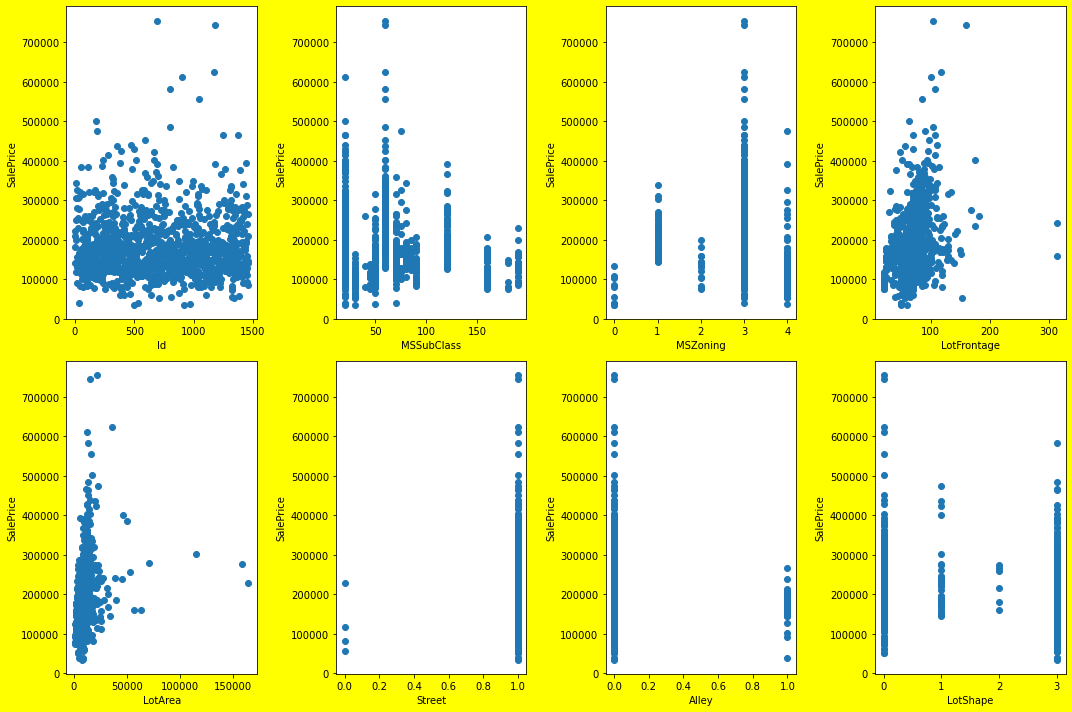

In [100]:
plt.figure(figsize=(15,10), facecolor= 'yellow')
plotnumber  =  1

for column in X:
    if plotnumber<=8  :
        aX  =  plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('SalePrice',fontsize=10)
    plotnumber+=1
plt.tight_layout()    

In [101]:
from sklearn.preprocessing import StandardScaler
# Data Scaling Formula Z=(x-mean)/std
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.43548658,  1.50830058, -0.02164599, ..., -0.60548713,
         0.33003329,  0.20793187],
       [ 0.39632483, -0.87704243, -0.02164599, ..., -0.60548713,
         0.33003329,  0.20793187],
       [ 0.16554544,  0.07709478, -0.02164599, ..., -0.60548713,
         0.33003329,  0.20793187],
       ...,
       [-1.26961389,  2.46243779, -0.02164599, ...,  0.8992128 ,
         0.33003329,  0.20793187],
       [-1.66626597,  0.31562908, -4.76211672, ...,  0.14686284,
         0.33003329,  0.20793187],
       [-0.25755011,  0.07709478, -0.02164599, ..., -1.3578371 ,
         0.33003329,  0.20793187]])

In [102]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [103]:
# Adjusted R2 score
regression.score(X_train,y_train)

0.8639932995895204

In [104]:
regression.score(X_test,y_test)

0.7096659180830871

In [105]:
y_pred = regression.predict(X_test)
y_pred

array([ 4.40335500e-01, -7.15584214e-01, -1.36207424e+00,  1.01221563e-01,
       -9.25611646e-01,  1.96263013e+00, -1.79053477e-01, -1.59756052e-01,
       -6.44403363e-01,  5.48643487e-01, -7.88132703e-01,  6.41483531e-01,
        5.05382103e-01,  5.38087057e-01, -4.76745766e-01,  1.13677407e+00,
       -9.99061265e-01,  1.12173001e+00, -4.56822458e-01,  3.28362223e-02,
       -2.35185102e-01,  1.84437372e+00,  2.72476445e-01, -4.73359632e-01,
       -3.50844690e-03, -8.43834316e-01, -5.50223472e-01, -2.43883178e-01,
        1.32497290e+00, -9.21835255e-02, -8.00936137e-02,  1.37966992e-01,
       -1.02931025e+00, -8.10560036e-01, -7.22743945e-01,  6.00261422e-01,
       -1.53702085e-01, -5.81890437e-01, -9.69727963e-01,  3.94121799e-01,
       -1.38863470e+00, -5.07449830e-01,  3.39319490e-01,  1.88848718e+00,
       -1.00838527e+00, -1.23017734e+00, -4.34823829e-01, -6.45461476e-01,
        6.04053533e-01,  7.59324063e-01, -5.54301633e-01, -1.37401400e+00,
       -5.12293977e-01, -

<function matplotlib.pyplot.show(close=None, block=None)>

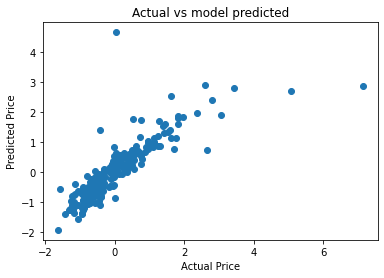

In [106]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs model predicted')
plt.show

MODEL EVALUATION

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred=regression.predict(X_test)

In [108]:
mean_absolute_error(y_test,y_pred)

0.30078526840513914

In [109]:
mean_squared_error(y_test,y_pred)

0.32398525611126916

In [110]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.569197027496867

LASSO REGULARIZATION

In [111]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV

# LassoCV will return bestalpha after max iteration
#Normalize is subtracting the mean and dividing by the L2-norm
lasscv  =  LassoCV(alphas  =  None, max_iter  =  100, normalize  =  True)
lasscv.fit(X_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [112]:
#best alpha parameter
alpha  =  lasscv.alpha_
alpha

0.003167682465172837

In [113]:
#now that we have best parameter, Let's use Lasso regression and see how well our data has fitted before

lasso_reg  =  Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.003167682465172837)

In [114]:
lasso_reg.score(X_test, y_test)

0.7140528580797989

Using RIDGE REGRESSION MODEL

In [115]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.

ridgecv  =  RidgeCV(alphas  =  np.arange(0.001, 0.1,0.01),normalize  =  True)

ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [116]:
ridgecv.alpha_

0.09099999999999998

In [117]:
ridge_model  =  Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.09099999999999998)

NOW IT'S TIME FOR PREDICTIONS

then use of df_test dataset

In [118]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [119]:
df_test.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   247.000000     292.000000   292.000000   
mean    755.955479   57.414384    66.425101   10645.143836     6.078767   
std     442.565228   43.780649    21.726343   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    53.500000    7200.000000     5.000000   
50%     778.000000   50.000000    65.000000    9200.000000     6.000000   
75%    1152.250000   70.000000    79.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count   292.000000   292.000000    292.000000   291.000000   292.000000  ...   
mean      5.493151  1972.616438   1985.294521   109.171821   439.294521  ...   
std       1.063267    30.447016     20.105792   175.030021   429.559675  ...   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000  ...   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000  ...   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000  ...   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000  ...   

       WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
count  292.000000   292.000000     292.000000  292.000000   292.000000   
mean    86.397260    47.061644      17.708904    2.489726    15.099315   
std    121.898836    65.865449      51.892906   30.247488    58.483473   
min      0.000000     0.000000       0.000000    0.000000     0.000000   
25%      0.000000     0.000000       0.000000    0.000000     0.000000   
50%      0.000000    28.500000       0.000000    0.000000     0.000000   
75%    149.250000    66.000000       0.000000    0.000000     0.000000   
max    728.000000   418.000000     330.000000  407.000000   396.000000   

       PoolArea  PoolQC      MiscVal      MoSold       YrSold  
count     292.0     0.0   292.000000  292.000000   292.000000  
mean        0.0     NaN    28.184932    6.232877  2007.859589  
std         0.0     NaN   224.036218    2.774556     1.322867  
min         0.0     NaN     0.000000    1.000000  2006.000000  
25%         0.0     NaN     0.000000    4.000000  2007.000000  
50%         0.0     NaN     0.000000    6.000000  2008.000000  
75%         0.0     NaN     0.000000    8.000000  2009.000000  
max         0.0     NaN  3500.000000   12.000000  2010.000000  

[8 rows x 38 columns]

In [120]:
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [121]:
df_test.shape

(292, 80)

In [122]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [123]:
type(df_test)

pandas.core.frame.DataFrame

In [124]:
df_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

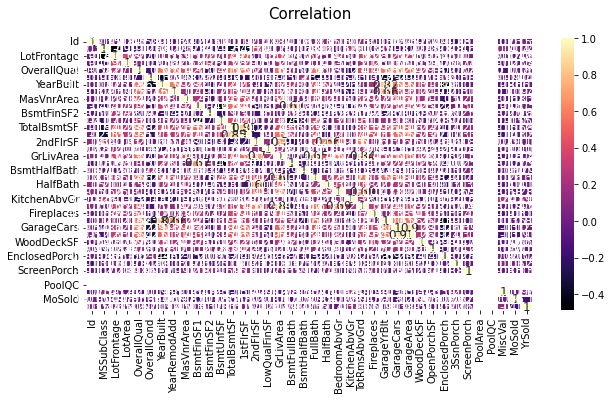

In [125]:
def correlation_heatmap(df_test):
    ax=plt.subplots(figsize=(10,5))
    colormap=sns.diverging_palette(220, 10, as_cmap = True)
    ax=sns.heatmap(df_test.corr(),cmap="magma",annot=True,linewidths=0.1,vmax=1.0,linecolor='white',annot_kws={'fontsize':12})
    plt.title('Correlation',y=1.05,size=15)

correlation_heatmap(df_test)

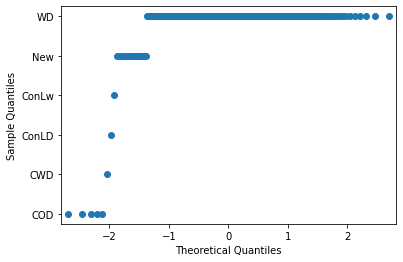

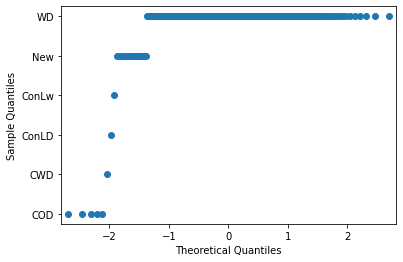

In [126]:
from statsmodels.graphics.gofplots import qqplot
def qq_plots(df_test):
    plt.figure(figsize=(10,4))
    qqplot(df_test,line='s')
    plt.title("NormalQQPlot")
    plt.show()
qqplot(df_test['SaleType'])

In [127]:
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [128]:
df_test.fillna(0)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave     0      IR1   
1    1018         120       RL          0.0     5814   Pave     0      IR1   
2     929          20       RL          0.0    11838   Pave     0      Reg   
3    1148          70       RL         75.0    12000   Pave     0      Reg   
4    1227          60       RL         86.0    14598   Pave     0      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave     0      Reg   
288  1048          20       RL         57.0     9245   Pave     0      IR2   
289    17          20       RL          0.0    11241   Pave     0      IR1   
290   523          50       RM         50.0     5000   Pave     0      Reg   
291  1379         160       RM         21.0     1953   Pave     0      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    0.0     0           0   
1           Lvl    AllPub  ...           0        0    0.0     0           0   
2           Lvl    AllPub  ...           0        0    0.0     0           0   
3           Bnk    AllPub  ...           0        0    0.0     0           0   
4           Lvl    AllPub  ...           0        0    0.0     0           0   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    0.0     0           0   
288         Lvl    AllPub  ...           0        0    0.0     0           0   
289         Lvl    AllPub  ...           0        0    0.0     0        Shed   
290         Lvl    AllPub  ...           0        0    0.0     0           0   
291         Lvl    AllPub  ...           0        0    0.0     0           0   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [129]:
X_train=df_test['LotArea']
X_test=df_test['YrSold']
y=df_test.SaleType

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
X_train=X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.3,random_state=42)

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(X_train, y_train)
pred = gbdt_clf.predict(X_train)

gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print("\n====================Train Result=====================")

print("Accuracy Score: ",accuracy_score(y_train,pred)*100 )

print("__________________________________________________")
print(f"CLASSIFICATION REPORT : \n{gbdt_clf_report}")
print("___________________________________________________")
print(f"Cofusion Matrix:  \n {confusion_matrix(y_train, pred)}\n")

#****************************Test score********************************

pred = gbdt_clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("\n==================Test Result==========================")
print("Accuracy: ", accuracy_score(y_test,pred) * 100)
print("_____________________________________________")
print(f"CLASSIFICATION REPORT :\n{clf_report}")
print("______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")



====================Train Result=====================
Accuracy Score:  99.01960784313727
__________________________________________________
CLASSIFICATION REPORT : 
                COD  CWD  ConLD  ConLw   New          WD  accuracy  \
precision  1.000000  1.0    1.0    1.0   1.0    0.989305  0.990196   
recall     0.500000  1.0    1.0    1.0   1.0    1.000000  0.990196   
f1-score   0.666667  1.0    1.0    1.0   1.0    0.994624  0.990196   
support    4.000000  1.0    1.0    1.0  12.0  185.000000  0.990196   

            macro avg  weighted avg  
precision    0.998217      0.990301  
recall       0.916667      0.990196  
f1-score     0.943548      0.988588  
support    204.000000    204.000000  
___________________________________________________
Cofusion Matrix:  
 [[  2   0   0   0   0   2]
 [  0   1   0   0   0   0]
 [  0   0   1   0   0   0]
 [  0   0   0   1   0   0]
 [  0   0   0   0  12   0]
 [  0   0   0   0   0 185]]


==================Test Result==========================


In [132]:
from sklearn.model_selection import GridSearchCV
grid_param = {
      'max_depth' : range(4,8),
      'min_sample_split' : range(2,8,2),
      'learning_rate' : np.arange(0.1,0.3)
}

In [133]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred=randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test, y_test)
print('The accuracy of the Random Forest Model is ', score_randomforest)

The accuracy of the Random Forest Model is  0.8636363636363636


In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred=knn.predict(X_test)
score_knn=knn.score(X_test,y_test)
print('The accuracy of the KNN Model is' , score_knn)

The accuracy of the KNN Model is 0.9431818181818182


In [135]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred=logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the LogisticRegression is', score_logreg)

The accuracy of the LogisticRegression is 0.9431818181818182


In [136]:
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred=logreg.predict(X_test)
score_svc=svc.score(X_test, y_test)
print('The accuarcy of SVC is', score_svc)

The accuarcy of SVC is 0.9431818181818182


In [137]:
print('The accuracy of the Random Forest Model is  0.8522727272727273')
print('The accuracy of the KNN Model is 0.9431818181818182')
print('The accuracy of the LogisticRegression is 0.9431818181818182')
print('The accuarcy of SVC is 0.9431818181818182')

The accuracy of the Random Forest Model is  0.8522727272727273
The accuracy of the KNN Model is 0.9431818181818182
The accuracy of the LogisticRegression is 0.9431818181818182
The accuarcy of SVC is 0.9431818181818182


These are the prediction  of Housing Project.

# THANK YOU